# Linear Regression Assignment
# Bike Sharing
### Submitted by- Anu Augustine
Date: 27th Nov 24

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes

## Problem Statement
Bike-sharing systems provide a convenient and sustainable transportation option by allowing individuals to borrow bikes for short-term use. These systems operate through computer-controlled docks, enabling users to rent and return bikes efficiently.

BoomBikes, a prominent bike-sharing service in the United States, has experienced a significant drop in revenue due to the COVID-19 pandemic. To recover from these losses and adapt to the changing market, the company seeks to develop a strategic business plan. This plan aims to address customer needs and optimize operations once the lockdown ends and economic conditions improve.

#### The primary goal is to analyze and understand the factors influencing the demand for shared bikes.
#### BoomBikes aims to identify:

**Key Variables:** Which variables are significant in predicting the demand for shared bikes.

**Demand Dynamics:** How well those variables describe the bike demands.

By building a robust predictive model using historical data, BoomBikes intends to:

* Forecast the demand for shared bikes based on critical variables.
* Adjust business strategies to meet customer demand effectively.
* Leverage insights to expand into new markets and maximize profits.
  
This analysis will empower BoomBikes to remain competitive in the post-pandemic era by aligning their services with customer expectations and market dynamics.

# Step 1: Reading and understanding Data

## Importing Libraries

In [390]:
# Import the numpy and pandas package
import pandas as pd                
import numpy as np                  

# Data Visualisation
import seaborn as sns               
import matplotlib.pyplot as plt     

 # For managing warnings and suppressing unnecessary warning messages.
import warnings                    
warnings.filterwarnings("ignore")   

import statsmodels.api as sm                                                # Used for creating statistical models and obtaining detailed reports on model performance.
import sklearn                                                              # A library for machine learning tasks, including model creation, evaluation, and feature selection.
from sklearn.metrics import r2_score                                        # To calculate the R-squared (R²) value, which measures model accuracy.
from sklearn.preprocessing import MinMaxScaler                              # Scales numeric data to a specific range (e.g., 0 to 1) for better model performance.
from sklearn.feature_selection import RFE                                   # Recursive Feature Elimination: selects important features by removing the least significant ones iteratively.
from sklearn.linear_model import LinearRegression                           # Provides tools for creating linear regression models.
from sklearn.model_selection import train_test_split                        # Splits the dataset into training and testing sets for model validation.
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Calculates Variance Inflation Factor (VIF) to check for multicollinearity among features.


## Reading the data

In [391]:
# Reading the dataset
df = pd.read_csv('day.csv')

In [392]:
# Displaying the first five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understanding the Dataset 

In [393]:

# Checking the dimensions
df.shape

(730, 16)

In [394]:
# checking the nulls and data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [395]:
# checking the summary statistics for the numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Cleaning the data

### - Mssing value check

In [396]:

# Count the number of completely empty rows (where all values are missing)
empty_rows = df.isnull().all(axis=1).sum()

# Output the result
print(f'Number of completely empty rows: {empty_rows}')

# Observation: There are no completely empty rows in the dataset

Number of completely empty rows: 0


In [397]:
#checking for empty columns (in %age)
round((100*df.isnull().sum())/len(df))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Observations
* No missing values and no dtype conversion is needed
* instant: This is just a record index and doesn't contribute to the prediction of bike demand. Drop this column.
* dteday: The date column is redundant because relevant date-related features like month (mnth), year (yr), and weekday (weekday) are already included.   Since we are not analyzing day-to-day trends, drop this column.
* casual and registered: These columns represent the counts of casual and registered users, respectively, and the target variable (cnt) is simply the     sum of both. Thus, drop these columns and use cnt as the target variable for prediction.
* season, mnth, weekday, weathersit are categorical data, so needs mapping.
* The columns yr, holiday, and workingday are categorical represented by binary (0 or 1), which means they represent two categories.

In [398]:
# Dropping unwanted columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [399]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [400]:
#Mapping numerical values to categorical labels for better interpretability

#The season column contains numeric values (1 to 4), which represent the four seasons, maps these numeric values to the corresponding season names.
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#The month column contains numeric values (1 to 12) representing the months of the year,  maps these numeric values to their corresponding month abbreviations.
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

#The weekday column contains numeric values (0 to 6), which correspond to the days of the week, maps these numeric values to their respective weekday abbreviations.
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

#The weathersit column contains numeric values (1 to 4), which correspond to different weather conditions, maps these numeric values to descriptive labels.
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})


In [401]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Categorizing into categorical and numerical columns

In [402]:

categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


### Outliers Analysis 

In [403]:
# Check unique values in each column
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

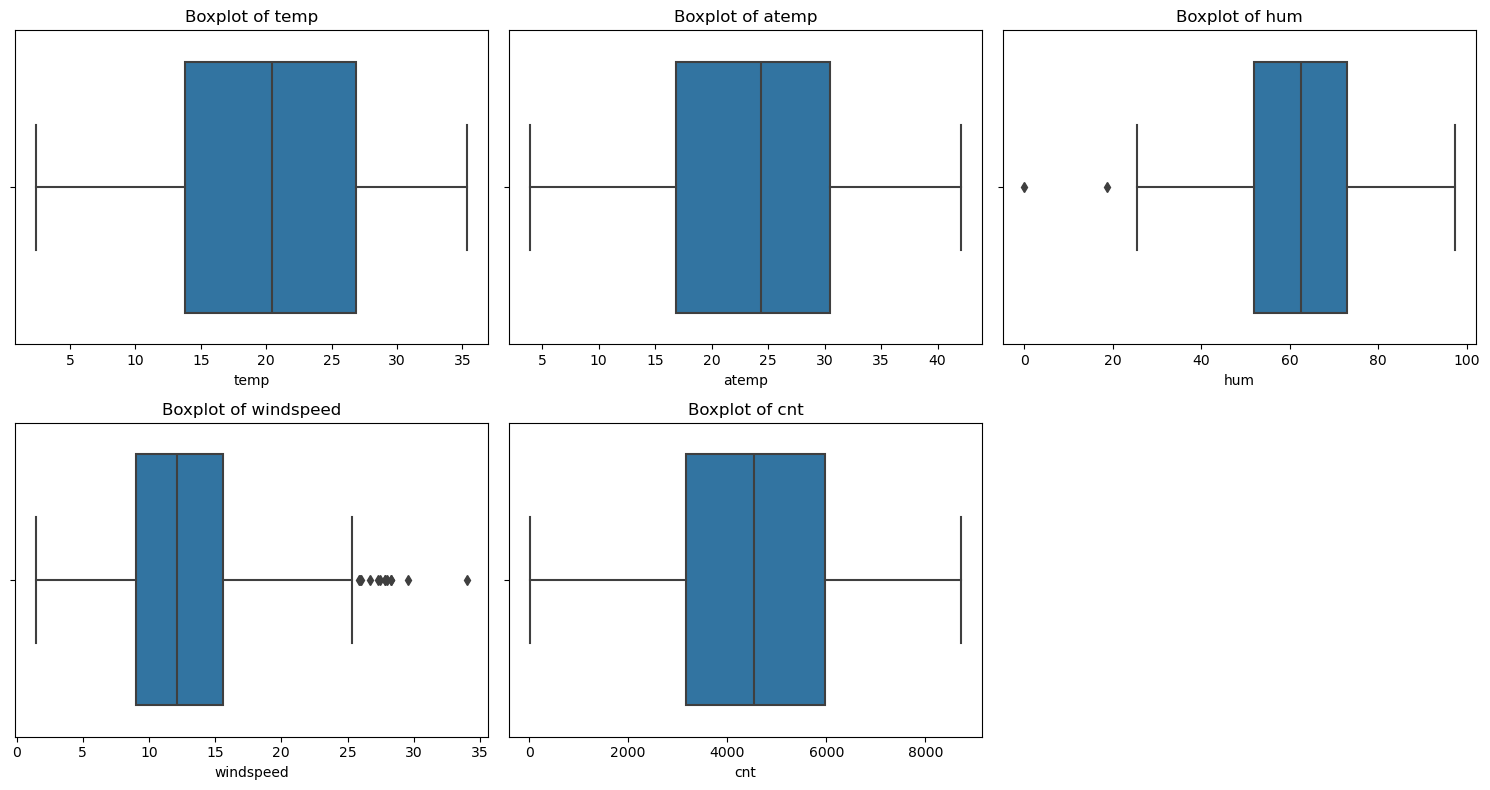

In [404]:
# Define the columns for continuous variables
cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Set the size of the plots
plt.figure(figsize=(15, 8))

# Create a boxplot for each column
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  # Creating a subplot with 2 rows and 3 columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()



In [405]:
# Function to detect and handle outliers using IQR method
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the upper/lower bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

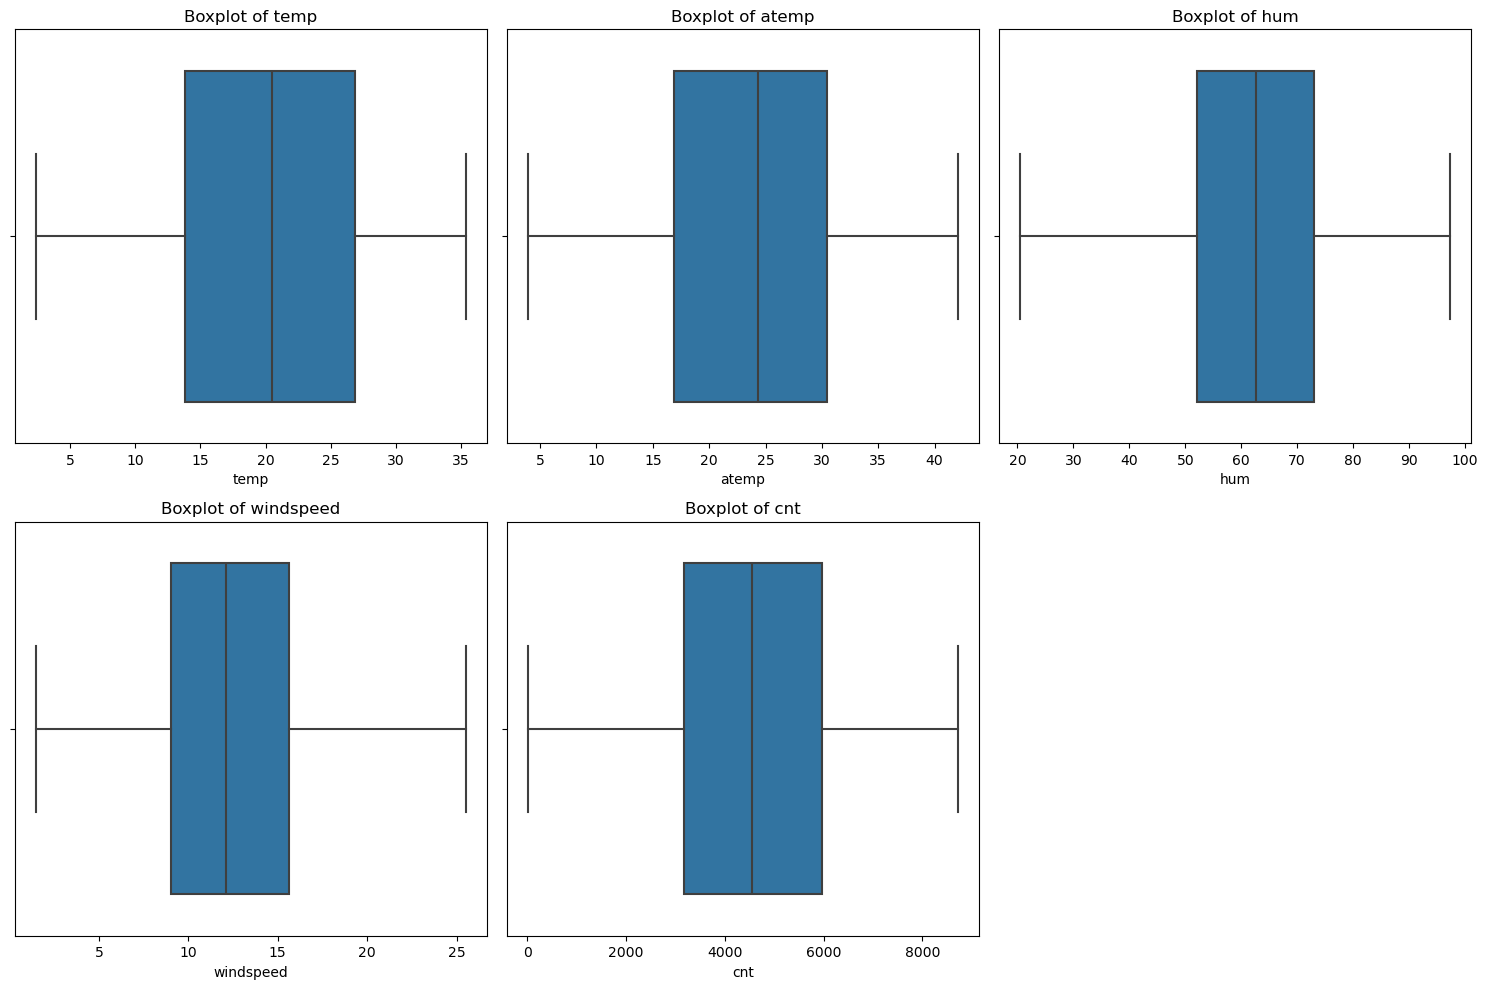

In [406]:
# Plotting function for boxplots
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)  # Create subplots
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Handle outliers
handle_outliers(df, cols)

# After handling outliers: Plot boxplots again to verify
plot_boxplots(df, cols)

### Univariate Analysis

#### - Numerical variables

In [407]:
# List of numerical columns to analyze
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Summary statistics /
print("Summary Statistics:")
print(df[numerical_columns].describe())


Summary Statistics:
             temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.795640   12.720661  4508.006849
std      7.506729    8.150308   14.126173    5.071566  1936.011647
min      2.424346    3.953480   20.515637    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   25.501498  8714.000000


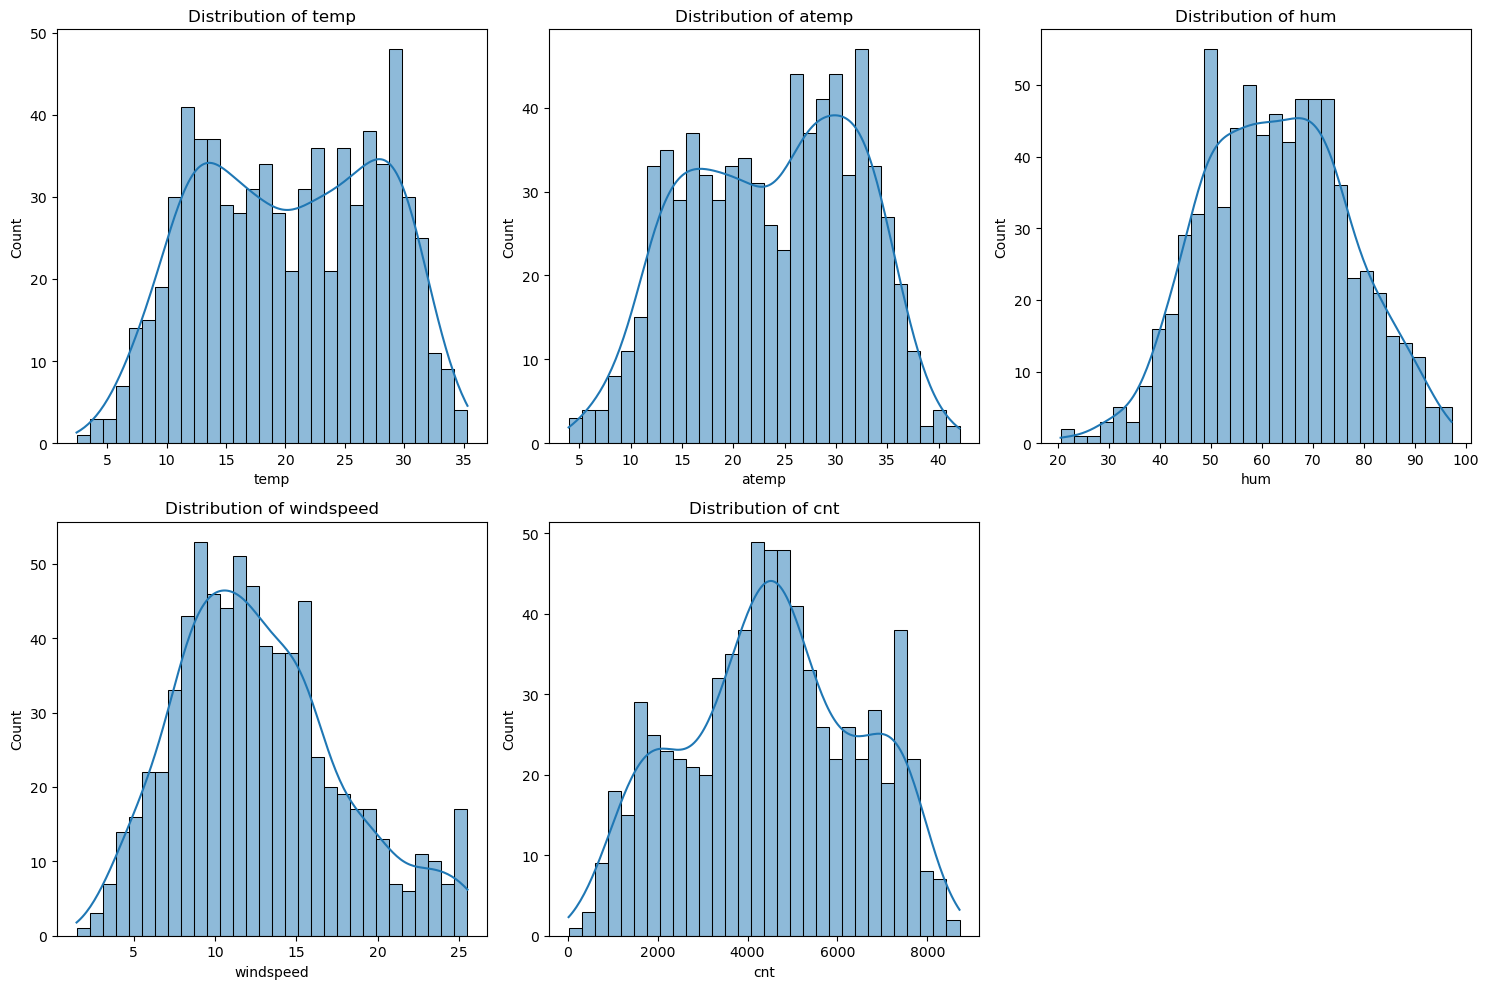

In [408]:
# Histogram

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### Inferences:
* **Temperature(temp):** The range of temperatures seems to be between 5°C and 35°C, The distribution of temperature is roughly uniform with a slight peak         around 25-30°C.This suggests that the temperature variable does not have significant skewness or outliers, and most days fall within a comfortable      temperature range.
* **Feeling Temperature (atemp):** The atemp distribution is similar to temp, with a slightly higher peak around 25-30°C.
    This indicates that the apparent temperature aligns closely with the actual temperature,This could reflect the actual feeling of temperature for        the users.
* **Humidity (hum):** The distribution of humidity is within a range of 30% to 100%, with a peak around 60-70%. The data is slightly right-skewed, with     fewer occurrences of very high or very low humidity levels.
* **Windspeed (windspeed):** The windspeed distribution is unimodal with a peak around 10-15 km/h. There is a noticeable drop-off after 20 km/h, and        the data appears slightly right-skewed, suggesting occasional higher wind speeds.
* **Count of Rentals (cnt):** The rental count (cnt) follows a slightly skewed distribution, with most rental counts falling between around 4500–5000       rentals. Most values range from 0 to 8500, with a few high-demand days exceeding 8000 rentals. These extreme values could be possibly influenced by     factors like holidays or weather..

#### -Categorical variables 

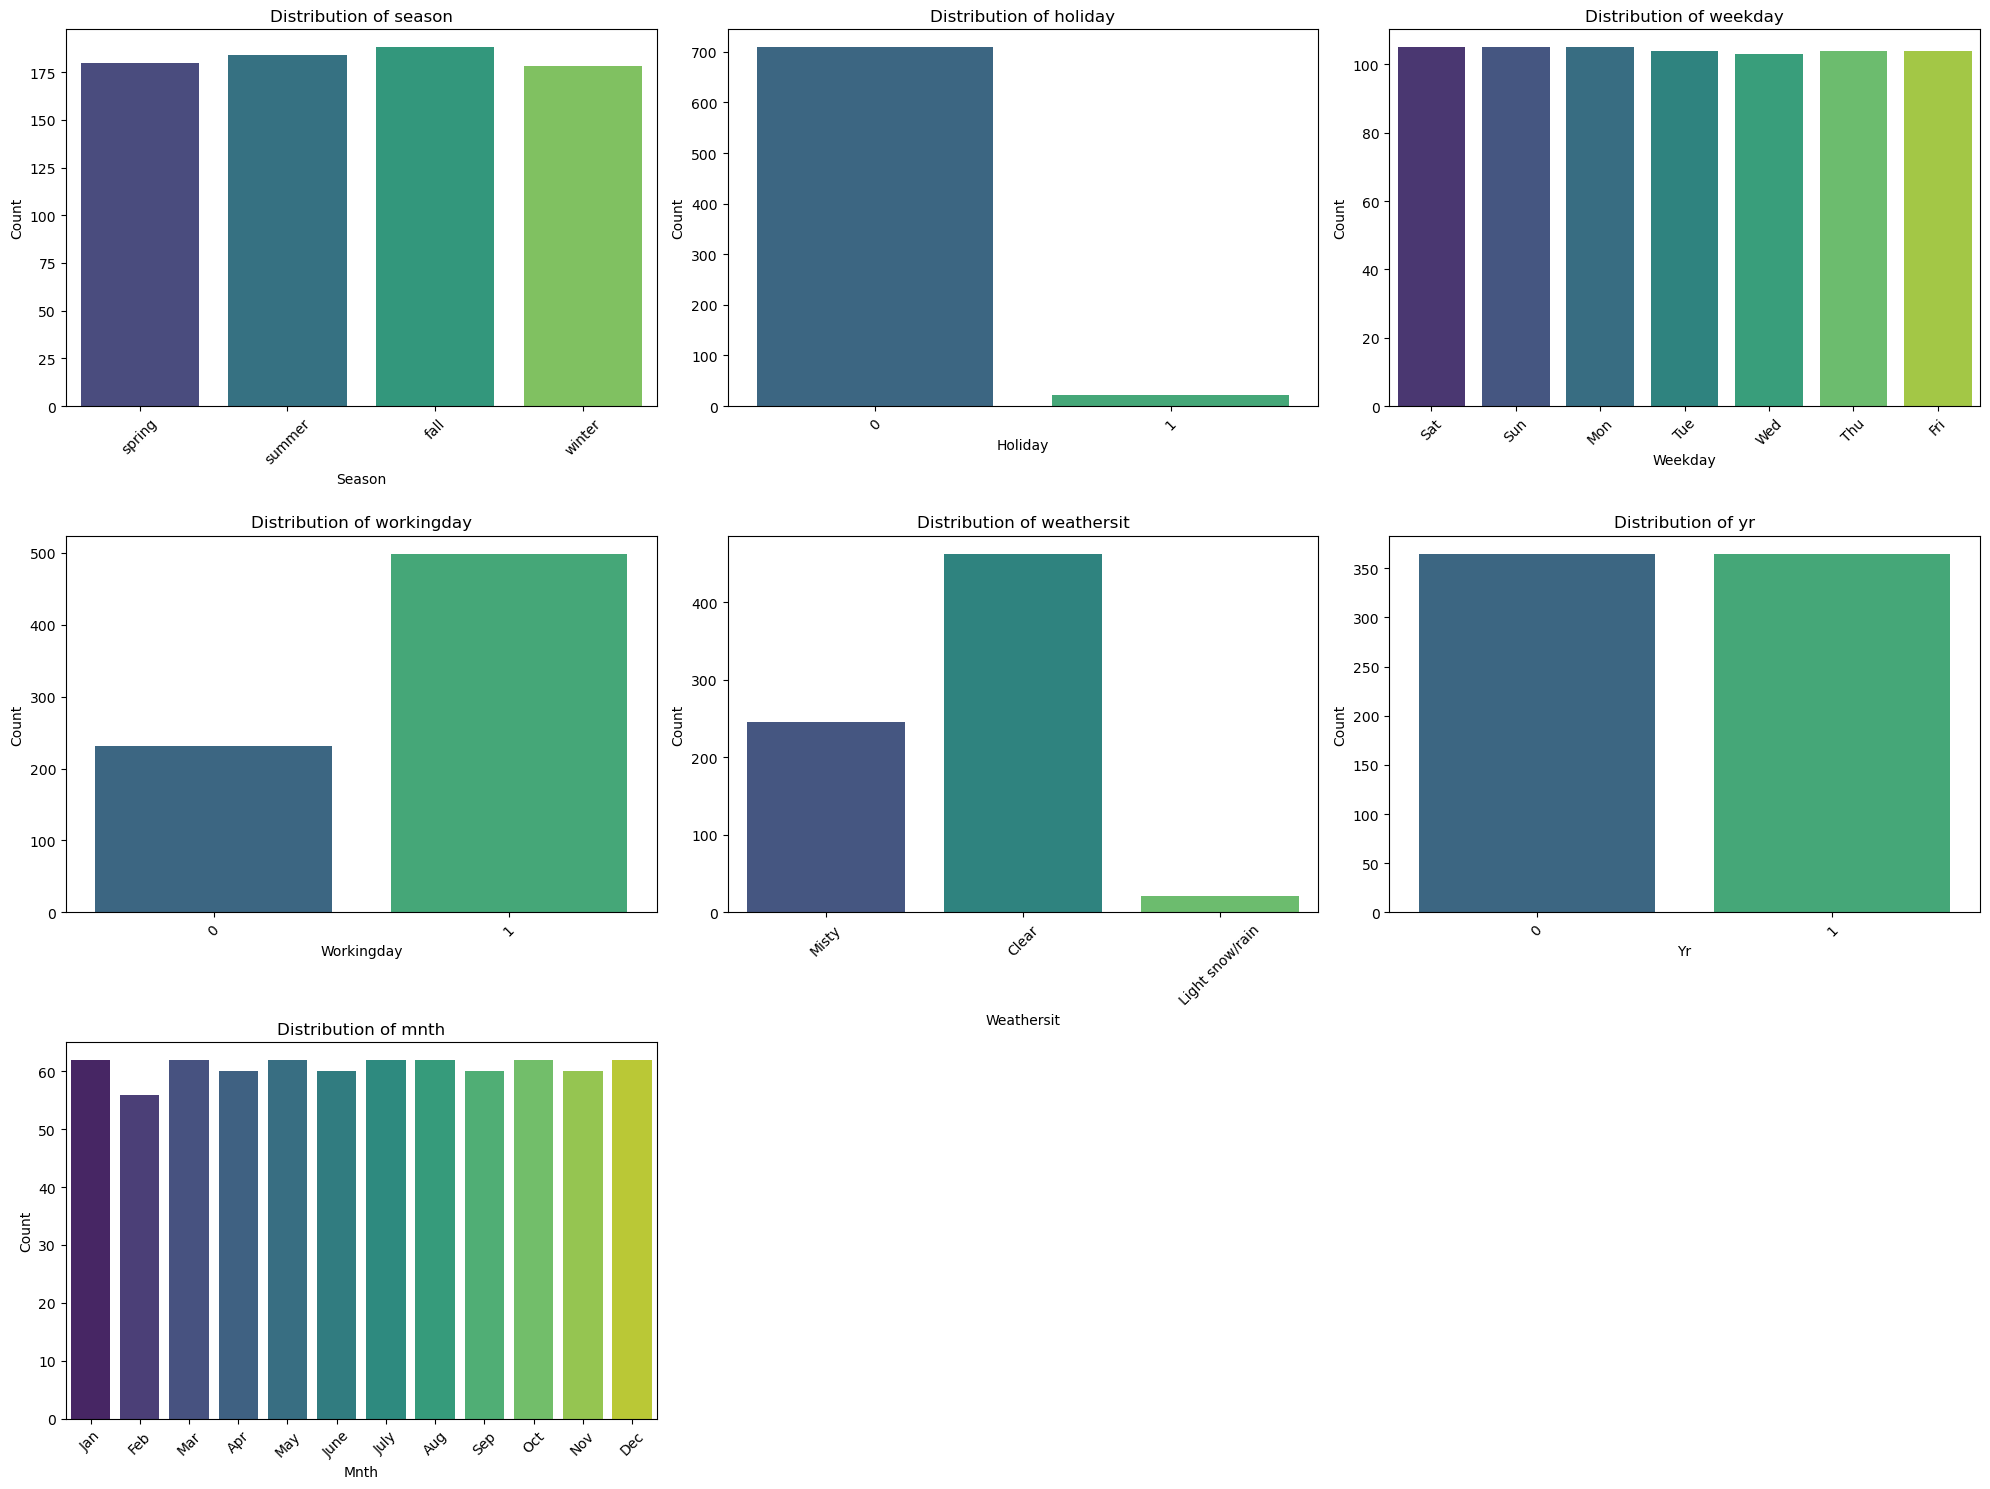

In [409]:
# List of categorical columns
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']

# Plotting count plots for each categorical variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size as needed
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observations:
* **Season:** The data is evenly distributed across the four seasons: Spring, Summer, Fall, and Winter.There is no significant dominance of one season      over others.
* **Holiday:** A large majority of the days are non-holidays (0). Only a small proportion of days are holidays (1).
* **Weekday:** The distribution across weekdays (Monday to Sunday) is fairly uniform. There doesn’t appear to be a specific day with significantly more     or fewer observations.
* **Working Day:** More data points are for working days (1) than for non-working days (0).
* **Weather Situation (weathersit):** Most of the data is categorized under "Clear" weather (category 1). A smaller number falls under "Misty" weather      (category 2), and very few instances are observed under "Light Snow/Rain" (category 3).
* **Year (yr):** Data is nearly balanced between the two years (0 for 2011 and 1 for 2012).
* **Month (mnth):** The data is evenly distributed across all months from January to December. There is no significant variation in data availability       between months.

### Bivariate Analysis
#### -Numerical vs Numerical

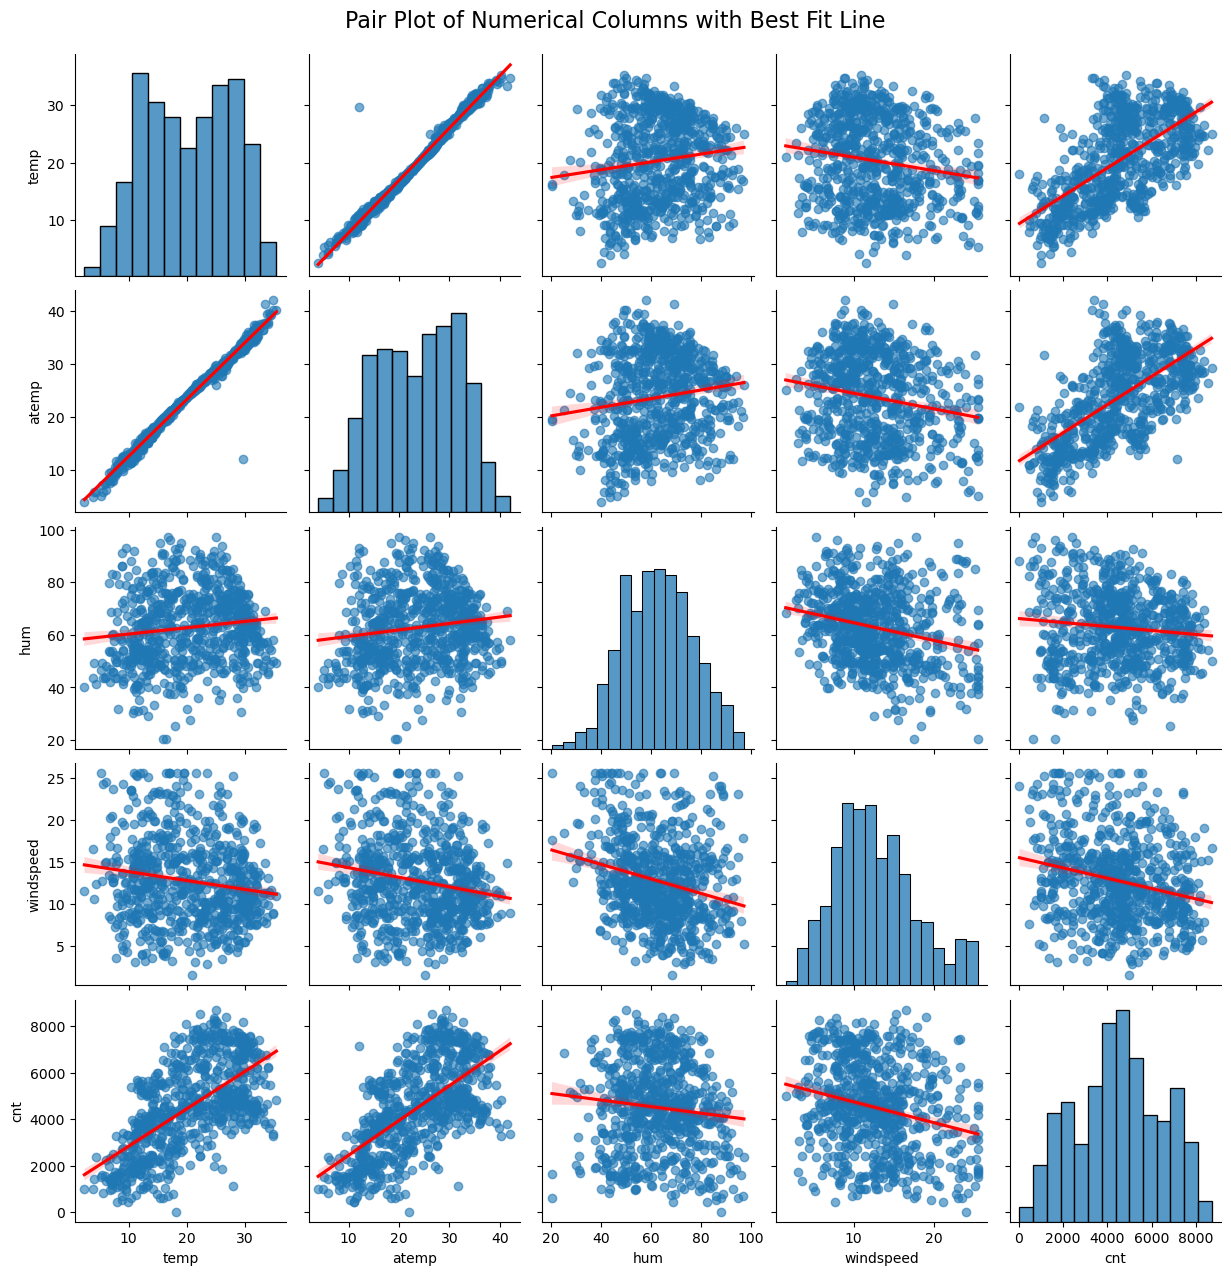

In [410]:
# Generate pairplot for all numerical variables
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Pair plot with regression lines
g = sns.pairplot(
    df[numerical_columns], 
    kind='reg', 
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)

# Add a title for the entire plot
g.fig.suptitle('Pair Plot of Numerical Columns with Best Fit Line', fontsize=16, y=1.02)

# Show the plot
plt.show()

#### Observations:
* temp and atemp exhibit a very strong positive linear relationship, as expected (since they represent similar measurements of temperature).
* temp and cnt: A positive trend is observed, indicating that bike demand increases with temperature.
* atemp and cnt: Similar to temp, there is a positive trend.
* hum and cnt: A slight negative relationship exists, suggesting that higher humidity may reduce bike demand.
* windspeed and cnt: A weak negative correlation is observed, indicating lower bike demand with higher wind speeds.
* temp and hum: No significant correlation is observed.
* temp and windspeed: No clear relationship is visible.
* hum and windspeed: A weak negative correlation is visible, with higher winds associated with slightly lower humidity.
* The demand (cnt) is positively influenced by temperature but negatively impacted by humidity and windspeed.

 #### Categorical vs. Numerical

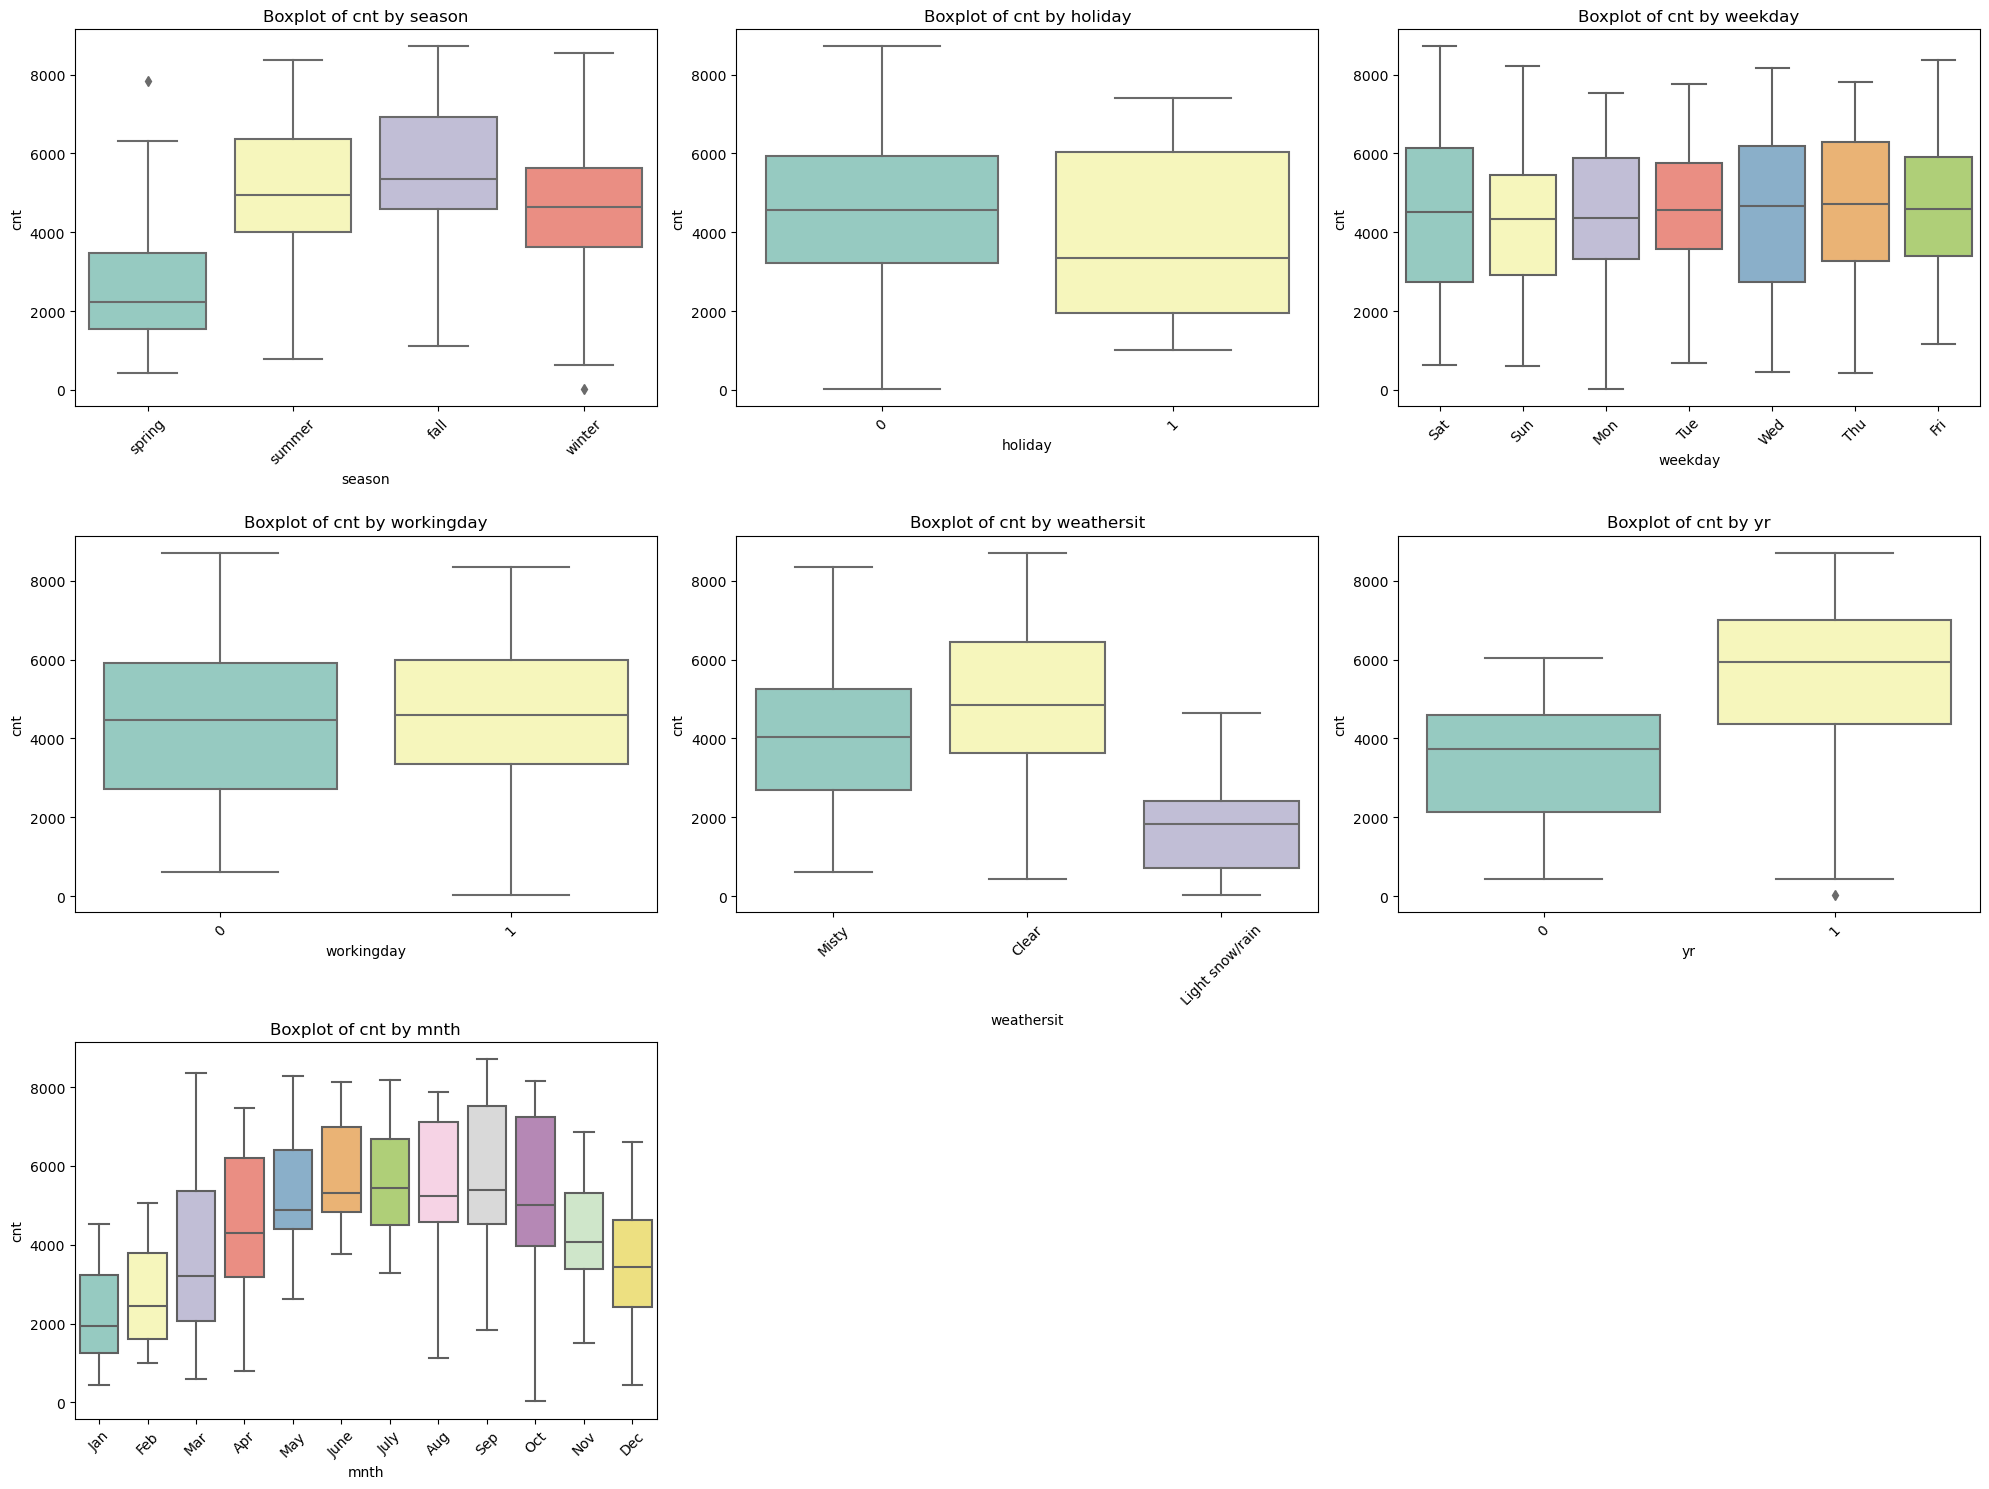

In [411]:
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']
target_variable = 'cnt'  # Numerical variable to compare with

# Create boxplots for all categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], y=df[target_variable], palette='Set3')
    plt.title(f"Boxplot of {target_variable} by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
* **Season vs cnt:** Bike rentals (cnt) are lowest in spring.The highest demand is observed in summer and fall.Winter has moderate demand, with a wider     range of rental counts.
* **Holiday vs cnt:** The median count of bike rentals is slightly lower on holidays compared to non-holidays, but there is considerable overlap.
* **Weekday vs cnt:** Bike rentals appear consistent across weekdays, with no significant variation in median counts, suggesting uniform demand             irrespective of the day
* **Workingday vs cnt:** Demand is slightly higher on working days than non-working days, though the difference is not drastic.
* **Weathersit vs cnt:** Clear weather has the highest median bike rentals. Cloudy weather sees moderate demand, while light snow/rain significantly        reduces rentals, indicating weather has a major impact.
* **Year (yr) vs cnt:** Rentals increased significantly in the second year (1), reflecting growing popularity or operational improvements over time.
* **Month (mnth) vs cnt:** Bike rentals peak between May and October, with July showing the highest median counts.Demand drops significantly in colder      months like January, February, and December.

#### Categorical vs. Categorical

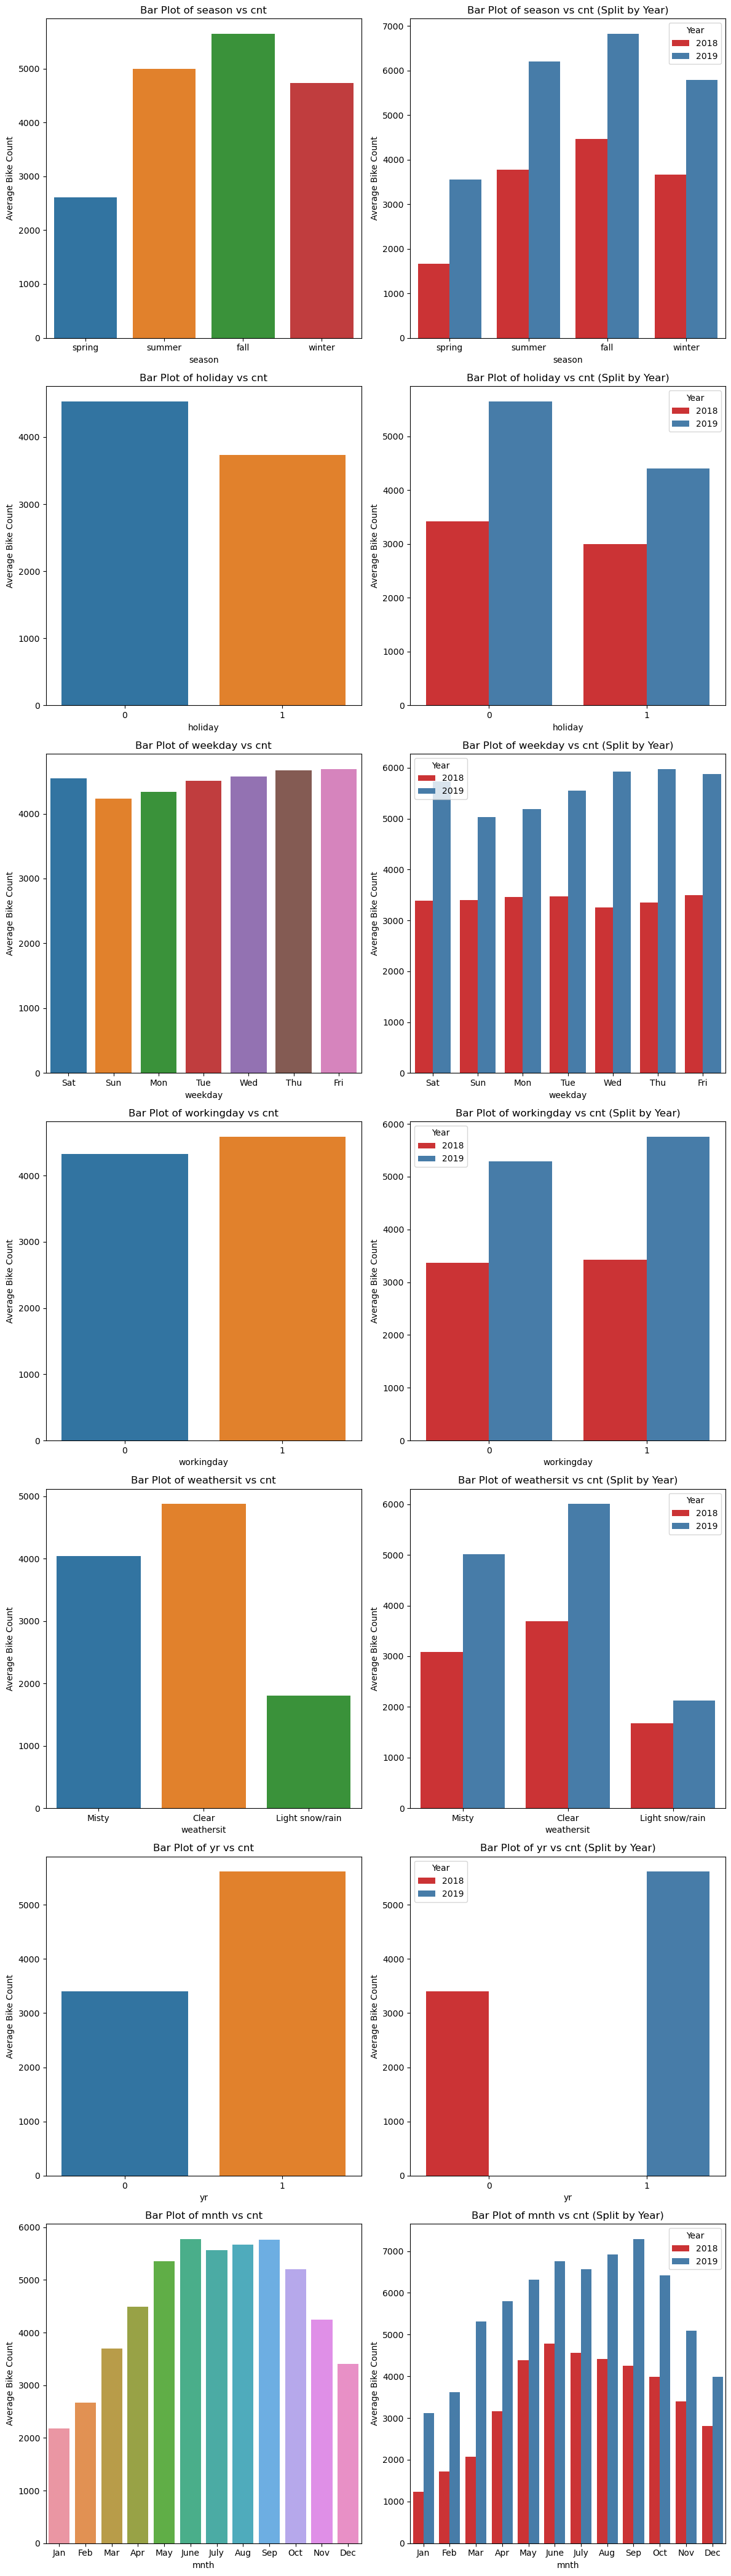

In [412]:
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']

# Convert columns to string for consistent plotting
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Set the figure size based on the number of categorical columns
plt.figure(figsize=(12, 6 * len(categorical_columns)))

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Overall bar plot
    plt.subplot(len(categorical_columns), 2, i * 2 + 1)  # Create the subplot for the first bar plot
    sns.barplot(x=col, y='cnt', data=df, estimator='mean', ci=None)  # Bar plot without confidence interval
    plt.title(f'Bar Plot of {col} vs cnt')  # Set the title of the plot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Average Bike Count')  # Set y-axis label
    
    # Bar plot with year as hue
    plt.subplot(len(categorical_columns), 2, i * 2 + 2)  # Create the subplot for the second bar plot
    sns.barplot(x=col, y='cnt', data=df, hue='yr', palette='Set1', estimator='mean', ci=None)  # Bar plot with hue
    plt.title(f'Bar Plot of {col} vs cnt (Split by Year)')  # Set the title of the plot with hue
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Average Bike Count')  # Set y-axis label
    plt.legend(title='Year', labels=['2018', '2019'])  # Set legend labels for the hue

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

#### Observations
* Based on the analysis, it is evident that bike rentals are significantly higher in the year 2019 across all categories. This indicates that in          comparison to other years, the year 2019 experienced a notable increase in bike rental activity.
* 
The findings suggest that various factors or conditions associated with the year 2019 might have contributed to the higher demand for bike rentals    . These factors could include favorable weather conditions, promotional campaigns, increased awareness about bike-sharing programs, or other externa    l factors that boosted the popularity of bike rentals during that particular yea
* 

Understanding the temporal patterns and identifying specific years with higher or lower bike rental activity is valuable for businesses              or organizations involved in bike rental services. It helps them make informed decisions regarding resource allocation, marketing strategies,          and operational planning to meet the demand and maximize the utilization of their bike rental services.

### Multivariate Analysis

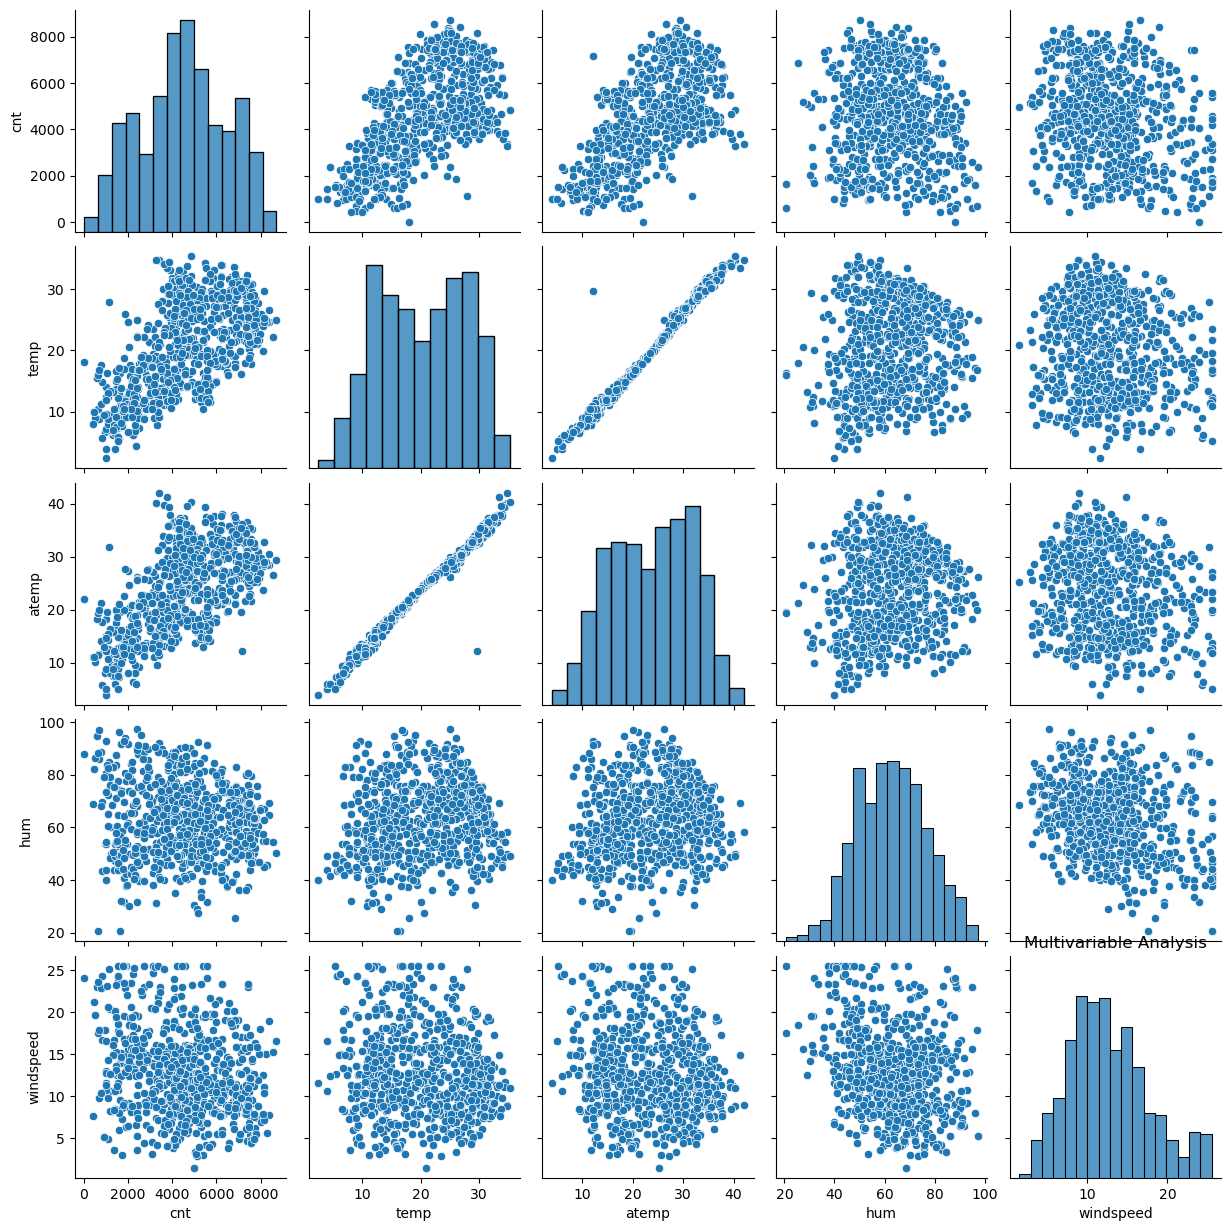

In [413]:
sns.pairplot(df[["cnt","temp","atemp","hum","windspeed"]], kind="scatter")
plt.title("Multivariable Analysis")
plt.show()

Highest Correlation: temp - atemp (0.99)


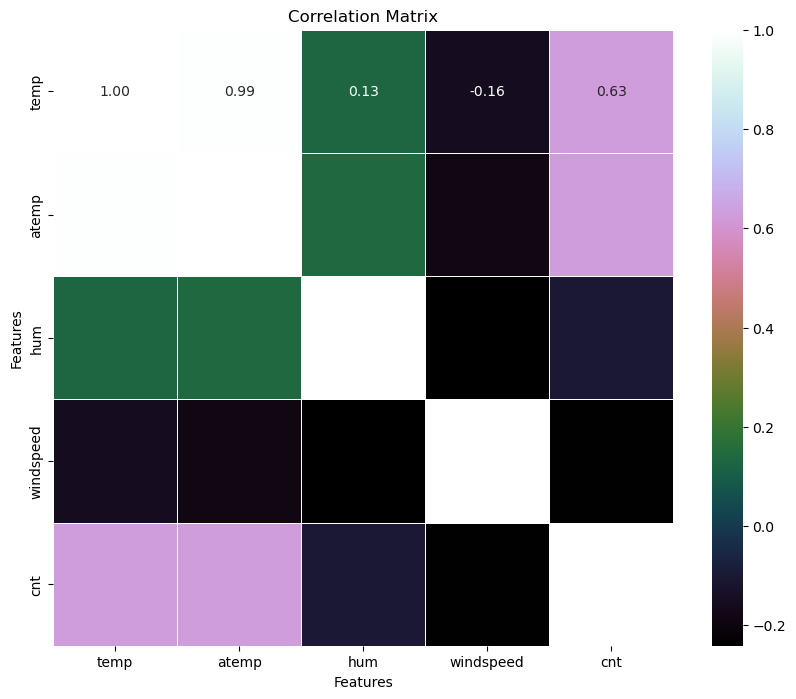

In [414]:
# Create correlation matrix
correlation_matrix = df[numerical_columns].corr()
# Set up the figure and axes
plt.figure(figsize=(10, 8))
# Create heatmap with custom color palette
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Find the pair of variables with the highest correlation
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr != 1.0]  # Exclude self-correlation
highest_corr_labels = highest_corr.idxmax()
# Get the highest correlated variables and their correlation value
var1, var2 = highest_corr_labels
corr_value = correlation_matrix.loc[var1, var2]
# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
# Print highest correlation separately
print(f'Highest Correlation: {var1} - {var2} ({corr_value:.2f})')
# Show the plot
plt.show()

#### Observations
*  Linearity between some predictive variables and response variable is observed and the Linear Modelling is appropriate for this model.
  * **Temp vs. Atemp:** Strong positive correlation (0.99), indicating that temperature and "feels-like" temperature are almost identical.
* **Temp vs. cnt (Count of Users):** Moderately strong positive correlation (0.63), suggesting that higher temperatures are associated with increased       user counts.
* **Humidity (Hum) vs. Count (CNT):** Slightly negative correlation, indicating that higher humidity could be associated with a lower count.
* **Windspeed vs. CNT:** Very weak correlation (close to zero), suggesting little relationship between wind speed and the number of users.

# Step 2: Data Preparation
### - Encoding categorical variables into numerical

In [415]:
# List of categorical columns to create dummies
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']

# Create dummy variables for each categorical column and drop the first column for each to avoid multicollinearity
months_df = pd.get_dummies(df['mnth'], drop_first=True)
weekdays_df = pd.get_dummies(df['weekday'], drop_first=True)
weathersit_df = pd.get_dummies(df['weathersit'], drop_first=True)
seasons_df = pd.get_dummies(df['season'], drop_first=True)

# Initialize df_dummy with a copy of the original DataFrame to avoid modifying the original df
df_dummy = df.copy()

# Merging the original df with the dummy variable datasets
df_dummy = pd.concat([df_dummy, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

# Verify the result
df_dummy.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [416]:



# Ensure all columns are numeric
df_dummy = df_dummy.apply(pd.to_numeric, errors='coerce')
df_dummy = df_dummy.fillna(0)

# Check for any remaining non-numeric data
if df_dummy.select_dtypes(include=['object']).empty:
    print("All columns are numeric.")
else:
    print("There are still non-numeric columns.")

# Convert boolean columns to numeric (0 and 1)
df_dummy = df_dummy.applymap(lambda x: 1 if x is True else (0 if x is False else x))

df_dummy.info()



All columns are numeric.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    float64
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    float64
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    float64
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    float64
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    float64
 12  Aug              730 non-null    int64  
 13  Dec              730 non-null    int64  
 14  Feb              730 non-null    int64  
 15  Jan              730 non-null    int64  
 16  July             730 non-null    int6

In [417]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_dummy.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [418]:
df_dummy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985.0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801.0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600.0,0,0,...,0,0,0,0,1,0,0,1,0,0


###  Splitting into Train and Test 

In [419]:
# Set a random seed for reproducibility
np.random.seed(0)

# Split the dataframe into train and test sets
df_train, df_test = train_test_split(df_dummy, train_size=0.7, random_state=100)

#Shape of the dataframe
print("Shape of the dataframe:",df_dummy.shape)

# Check the shape of the training dataset
print("Training dataset shape:", df_train.shape)

# Check the shape of the testing dataset
print("Testing dataset shape:", df_test.shape)

Shape of the dataframe: (730, 30)
Training dataset shape: (510, 30)
Testing dataset shape: (220, 30)


### Rescaling the variables

In [420]:
# Define numerical columns if not already defined
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns in the training dataset
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

# Verify the scaled training dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.652079,0.363923,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.543728,0.351077,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.363506,0.911723,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.371673,0.259139,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.685292,0.523822,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [421]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.557348,0.438893,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.182829,0.226881,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.414959,0.273856,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.560879,0.408027,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.689104,0.569834,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Training the model

### The correlation heatmap is a crucial tool for gaining valuable insights into the dataset

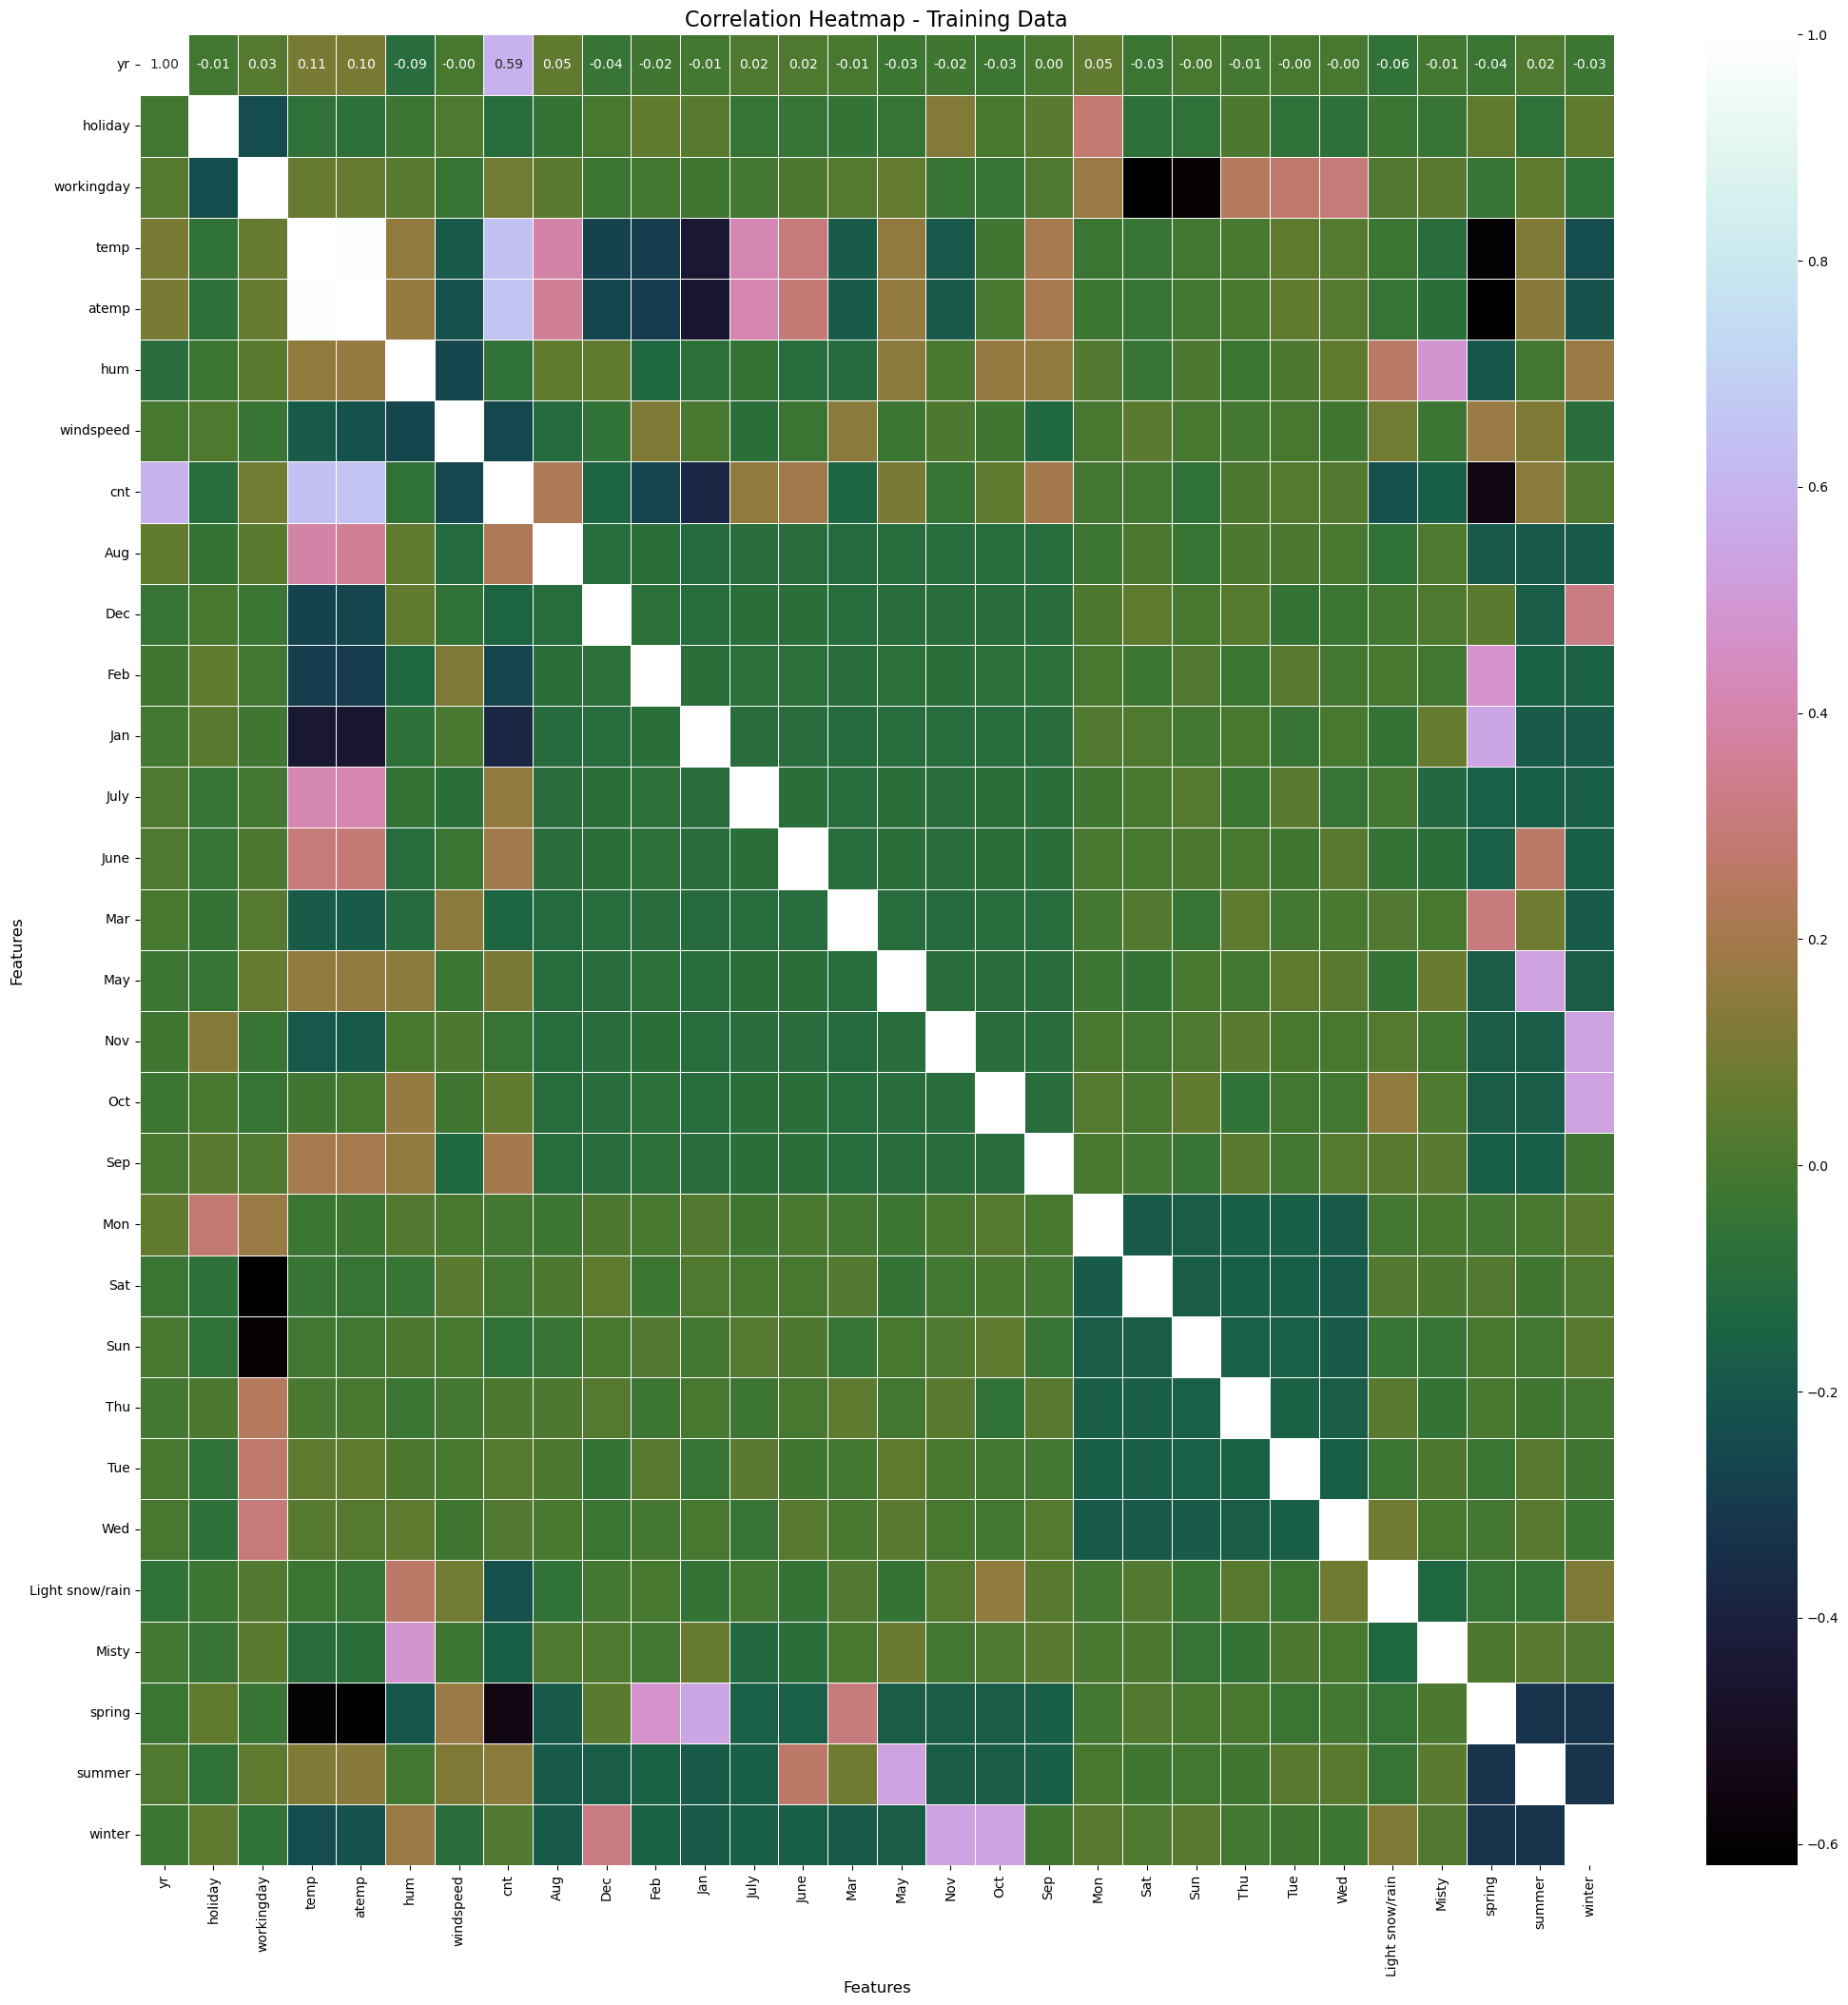

In [422]:
# Calculate the correlation matrix for the training dataset
corr_matrix = df_train.corr()

# Set up the figure and axes with an appropriate figure size for readability
plt.figure(figsize=(25, 25))

# Create the heatmap with annotations for correlation values
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,          # Display the correlation values on the heatmap
    cmap='cubehelix',    # Use the 'cubehelix' colormap for better color distinction
    fmt=".2f",           # Format the displayed correlation values to 2 decimal places
    linewidths=0.5       # Add spacing between cells
)

# Set the title and labels for better interpretation
plt.title('Correlation Heatmap - Training Data', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the heatmap plot
plt.show()


### Key Insights from the Correlation Heatmap:
* **Feature Selection:** Strong correlations between independent variables and the target variable (cnt) suggest these variables may be significant          predictors. Variables with weak or no correlation with cnt might be less impactful and could potentially be excluded.
* **Multicollinearity:** High correlations between independent variables indicate multicollinearity, which can inflate the variance of coefficient          estimates in regression models. Such variables may require further analysis using techniques like Variance Inflation Factor (VIF) or one of them        might be dropped.
* **Redundant Variables:** Identifying pairs or groups of features that are highly correlated helps remove redundancy, ensuring the model isn't             unnecessarily complex.
* **Understanding Variable Impact:** Positive correlations with cnt suggest that as the value of a feature increases, bike demand is likely to increase.
    Negative correlations indicate that an increase in the feature value might lead to a decrease in demand.

### As the Y-variable is the count and with respect to the count we can see the following X- variables have the correlations as follows:

* Top Positive correlation variables:
   * temperature has the highest positive correlation with count 
   * atemp also has the highest positive correlation with count ( atemp is highly correlated with the temperature so it is a derived variable)
   * year has the positive correlation with count 
   * Sep and June has the positive correlation with count 
   * Aug has the positive correlation with count 
   * July has the positive correlation with count

* Top Negetive correlation variables:
   * spring has the negetive correlation with count
   * Jan has the negetive correlation with count
   * Feb has the negetive correlation with count
   * Humidity has the negetive correlation with count
   * lightsnow/rain has the negetive correlation with count
   * Dec has the negetive correlation with the count 

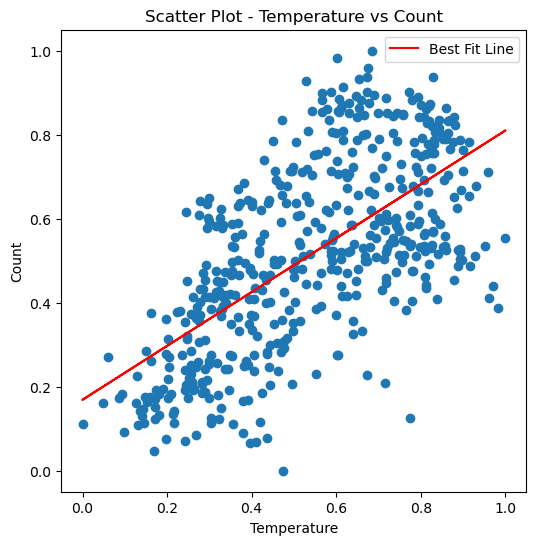

In [423]:
# plotting the best fit line with y as count and x as temp
plt.figure(figsize=[6, 6])
plt.scatter(df_train['temp'], df_train['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot - Temperature vs Count')
# Calculate the line of best fit using numpy
x = df_train['temp']
y = df_train['cnt']
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line (1st degree polynomial)
# Plot the best fit line
plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()

### Observation:
* **Positive Correlation:** The scatter plot clearly shows an upward trend, indicating a positive correlation between temperature and bike-sharing          demand (count). As temperature increases, the number of bike rentals also tends to increase.
* **Linear Relationship:** The red best-fit line aligns well with the data points, suggesting a linear relationship between temperature and bike            rentals. This supports the use of temperature as a predictor in a linear regression model.
* **Spread of Data:** The data points are widely scattered around the best-fit line, indicating some variability in the count that may not be explained     solely by temperature. This suggests other factors (e.g., weather conditions, seasonality, etc.) likely also influence bike rentals.
* This plot helps confirm that temperature is a significant feature to include in the predictive model. It also sets the stage for further steps, such    as checking for multicollinearity with other features to ensure robust model development.

### Dividing into X and Y sets for the model building

In [424]:
# Extract the target variable 'count' from the training dataset,'count' represents the dependent variable we want to predict
y_train = df_train['cnt']

# Remove the 'count' column from the training dataset to prepare the feature set, this ensures X_train contains only the independent variables
X_train = df_train.drop('cnt', axis=1)


### Recursive feature elimination - RFE

In [425]:
# Create a linear regression model
reg_model = LinearRegression()

# Perform RFE to select the top 15 features
rfe = RFE(estimator=reg_model, n_features_to_select=15)

# Fit the RFE model using the training data,this will rank all the features and identify the top 15 most important ones
rfe = rfe.fit(X_train, y_train)

# Create a list of selected features based on RFE
selected_features = [
    (feat, support, rank) 
    for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) 
    if support  # Include only the features that are selected (support=True)
]

# Display the selected features, along with their RFE support status and ranking
selected_features


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Jan', True, 1),
 ('Sep', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Light snow/rain', True, 1),
 ('Misty', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [426]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed', 'spring'],
      dtype='object')

In [427]:
# Extract the selected feature names
selected_columns = [feature for feature, support, rank in selected_features]

# Display the list of selected feature names
selected_columns


['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'Aug',
 'Jan',
 'Sep',
 'Sat',
 'Sun',
 'Light snow/rain',
 'Misty',
 'summer',
 'winter']

In [428]:
# Create a new DataFrame containing only the RFE-selected features
X_train_rfe = X_train[selected_columns]


In [429]:
# Add a constant column to the selected features for the intercept
X_train_reg_model_1 = sm.add_constant(X_train_rfe)

# Build the Ordinary Least Squares (OLS) linear regression model
reg_model_1 = sm.OLS(y_train, X_train_reg_model_1).fit()

# Display the summary of the regression model
print(reg_model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.00e-191
Time:                        22:55:20   Log-Likelihood:                 517.67
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1466      0.019     

### Variance Inflation Factor (VIF)

In [430]:
# Function to calculate VIF for each feature in the dataset
def calVIF(df):
    vif = pd.DataFrame({'Features': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})
    vif['VIF'] = vif['VIF'].round(2)  # Round the VIF values to 2 decimal places
    vif = vif.sort_values(by="VIF", ascending=False)  # Sort the VIF values in descending order
    return vif  # Return the VIF result

# Calculate VIF for the selected features in the training set
vif_result = calVIF(X_train_rfe)
print(vif_result)  # Display the VIF results


           Features    VIF
2        workingday  23.33
9               Sat   5.97
10              Sun   5.84
3              temp   1.95
4               hum   1.93
1           holiday   1.83
12            Misty   1.59
14           winter   1.58
7               Jan   1.55
13           summer   1.48
6               Aug   1.45
11  Light snow/rain   1.28
8               Sep   1.22
5         windspeed   1.20
0                yr   1.03




* Given that workingday has a high VIF, it could be removed from the model to improve the stability of the coefficients



In [431]:
# Dropping 'workingday' from X_train_rfe as it shows high VIF values
X_train_updated = X_train_rfe.drop(['workingday'], axis=1)

# Recalculate VIF for the updated dataset
vif_result_new = calVIF(X_train_updated)

# Display the new VIF results
vif_result_new


,Features,VIF
3,hum,13.71
2,temp,9.93
4,windspeed,3.56
11,Misty,2.35
0,yr,2.04
13,winter,1.96
12,summer,1.95
5,Aug,1.60
6,Jan,1.45
7,Sep,1.32


* As humidity has high VIF, we can remove it as well.

In [432]:
# Drop the 'humidity' and 'workingday' columns
X_train_updated = X_train_rfe.drop(['hum', 'workingday'], axis=1)

# Recalculate VIF for the updated dataset
vif_result_new = calVIF(X_train_updated)

# Display the new VIF results
vif_result_new

,Features,VIF
2,temp,5.21
3,windspeed,3.52
0,yr,2.04
11,summer,1.90
4,Aug,1.60
12,winter,1.57
10,Misty,1.55
6,Sep,1.32
5,Jan,1.24
7,Sat,1.22


##### After the feature elimination process based on the VIF values, the updated features now have acceptable VIF values, we can conclude that there is no significant issue with multicollinearity among the features. As a result, we will stop eliminating features based on VIF scores. Instead, our next step will be to perform manual feature elimination based on p-values to ensure that only statistically significant features are retained in the model.

### Manual Feature Elimination Using P-Value

In [433]:

# Building 2nd linear regression model

X_train_reg_model_2 = sm.add_constant(X_train_updated)
reg_model_2 = sm.OLS(y_train, X_train_reg_model_2).fit()
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.23e-188
Time:                        22:55:20   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     496   BIC:                            -929.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1612      0.020     

In [434]:
# Dropping 'Sat' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Sat'], axis=1)

# Building 3rd linear regression model
X_train_reg_model_3 = sm.add_constant(X_train_updated)
reg_model_3 = sm.OLS(y_train, X_train_reg_model_3).fit()
print(reg_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.22e-189
Time:                        22:55:20   Log-Likelihood:                 507.83
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     497   BIC:                            -934.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1632      0.019     

All features have p-values less than 0.05, indicating that they are statistically significant at the 5% level. Let's check VIF values also to conclude the featurs

In [435]:
# Dropping 'Jan' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Jan'], axis=1)

# Building 4th linear regression model
X_train_reg_model_4 = sm.add_constant(X_train_updated)
reg_model_4 = sm.OLS(y_train, X_train_reg_model_4).fit()
print(reg_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.40e-189
Time:                        22:55:21   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1387      0.017     

In [436]:
# Dropping 'Aug' from X_train_rfe 
X_train_updated = X_train_updated.drop(['Aug'], axis=1)

# Building 5th linear regression model
X_train_reg_model_5 = sm.add_constant(X_train_updated)
reg_model_5 = sm.OLS(y_train, X_train_reg_model_5).fit()
print(reg_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     254.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.11e-188
Time:                        22:55:21   Log-Likelihood:                 499.85
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     499   BIC:                            -931.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1344      0.017     

In [437]:
calVIF(X_train_updated)

,Features,VIF
2,temp,3.75
3,windspeed,3.17
0,yr,2.00
8,summer,1.57
7,Misty,1.49
9,winter,1.39
4,Sep,1.21
5,Sun,1.17
6,Light snow/rain,1.09
1,holiday,1.04


Since all the VIF values for the variables are now less than the threshold of 5, it indicates that multicollinearity is no longer a concern in the model. This means the remaining features are independent enough to be used in the model without issues caused by highly correlated predictors.

In [438]:
reg_model_5.params

const              0.134362
yr                 0.232709
holiday           -0.106225
temp               0.547535
windspeed         -0.112967
Sep                0.099472
Sun               -0.049734
Light snow/rain   -0.287722
Misty             -0.080225
summer             0.088238
winter             0.131342
dtype: float64

In [439]:
X_train_reg_model_5

,const,yr,holiday,temp,windspeed,Sep,Sun,Light snow/rain,Misty,summer,winter
576,1.0,1,0,0.815169,0.363923,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.351077,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.911723,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.259139,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.523822,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.257304,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.153138,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.593715,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.728548,0,0,0,1,1,0


# Step 4: Residual Analysis of the train data

### Checking the normality of the error terms

In [440]:
y_train_pred = reg_model_5.predict(X_train_reg_model_5)


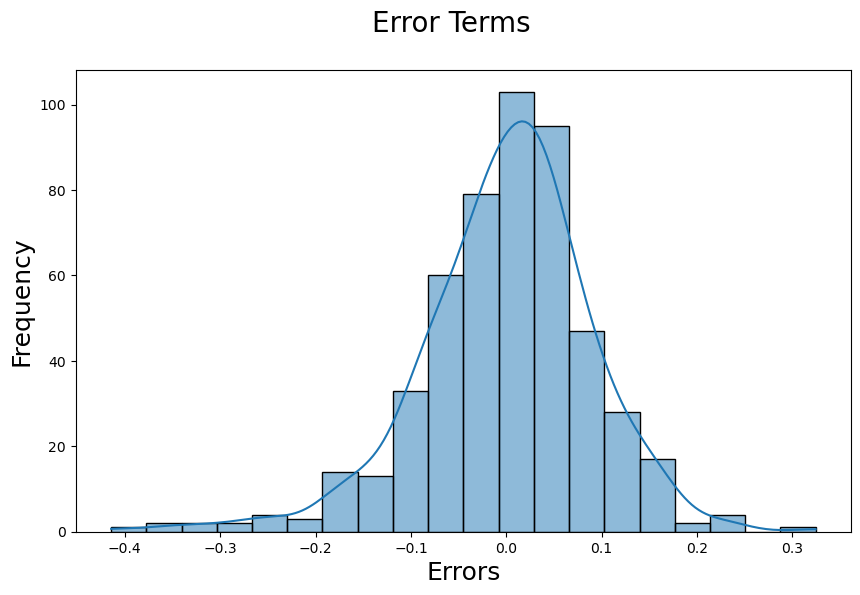

In [441]:
#checking error terms are normally distributed or not, inorder to validate our assumption.

error_terms = y_train - y_train_pred

# Plot the histogram of the error terms
plt.figure(figsize=(10, 6))
sns.histplot(error_terms, kde=True, bins=20)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

#### The plot of error terms show a normal distribution, with most errors concentrated around zero. This suggests that the error terms are normally distributed, which validates the key assumption of normality for linear regression

### Homoscidasticity

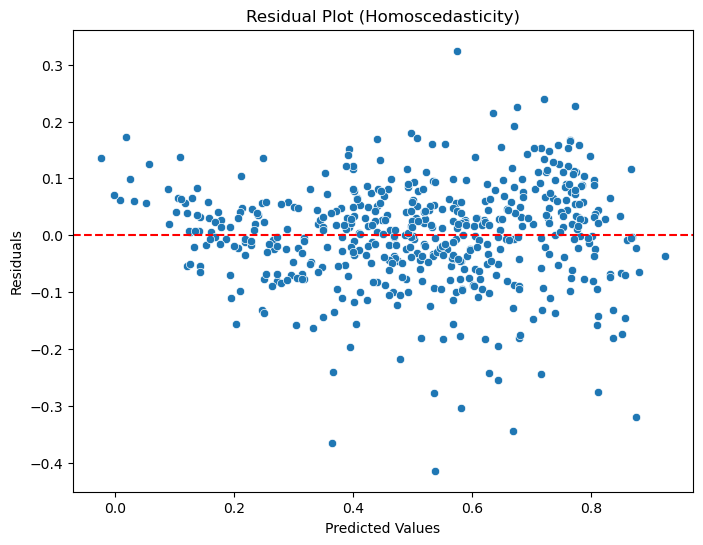

In [442]:
# Calculate predicted values and residuals
y_train_pred = reg_model_5.predict(sm.add_constant(X_train_reg_model_5))  # Ensure constant term is added
residuals = y_train - y_train_pred

# Plot the scatter plot of Residuals vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)  # Specify x and y arguments
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity)')
plt.show()


### Checking for Multi Collinearity 

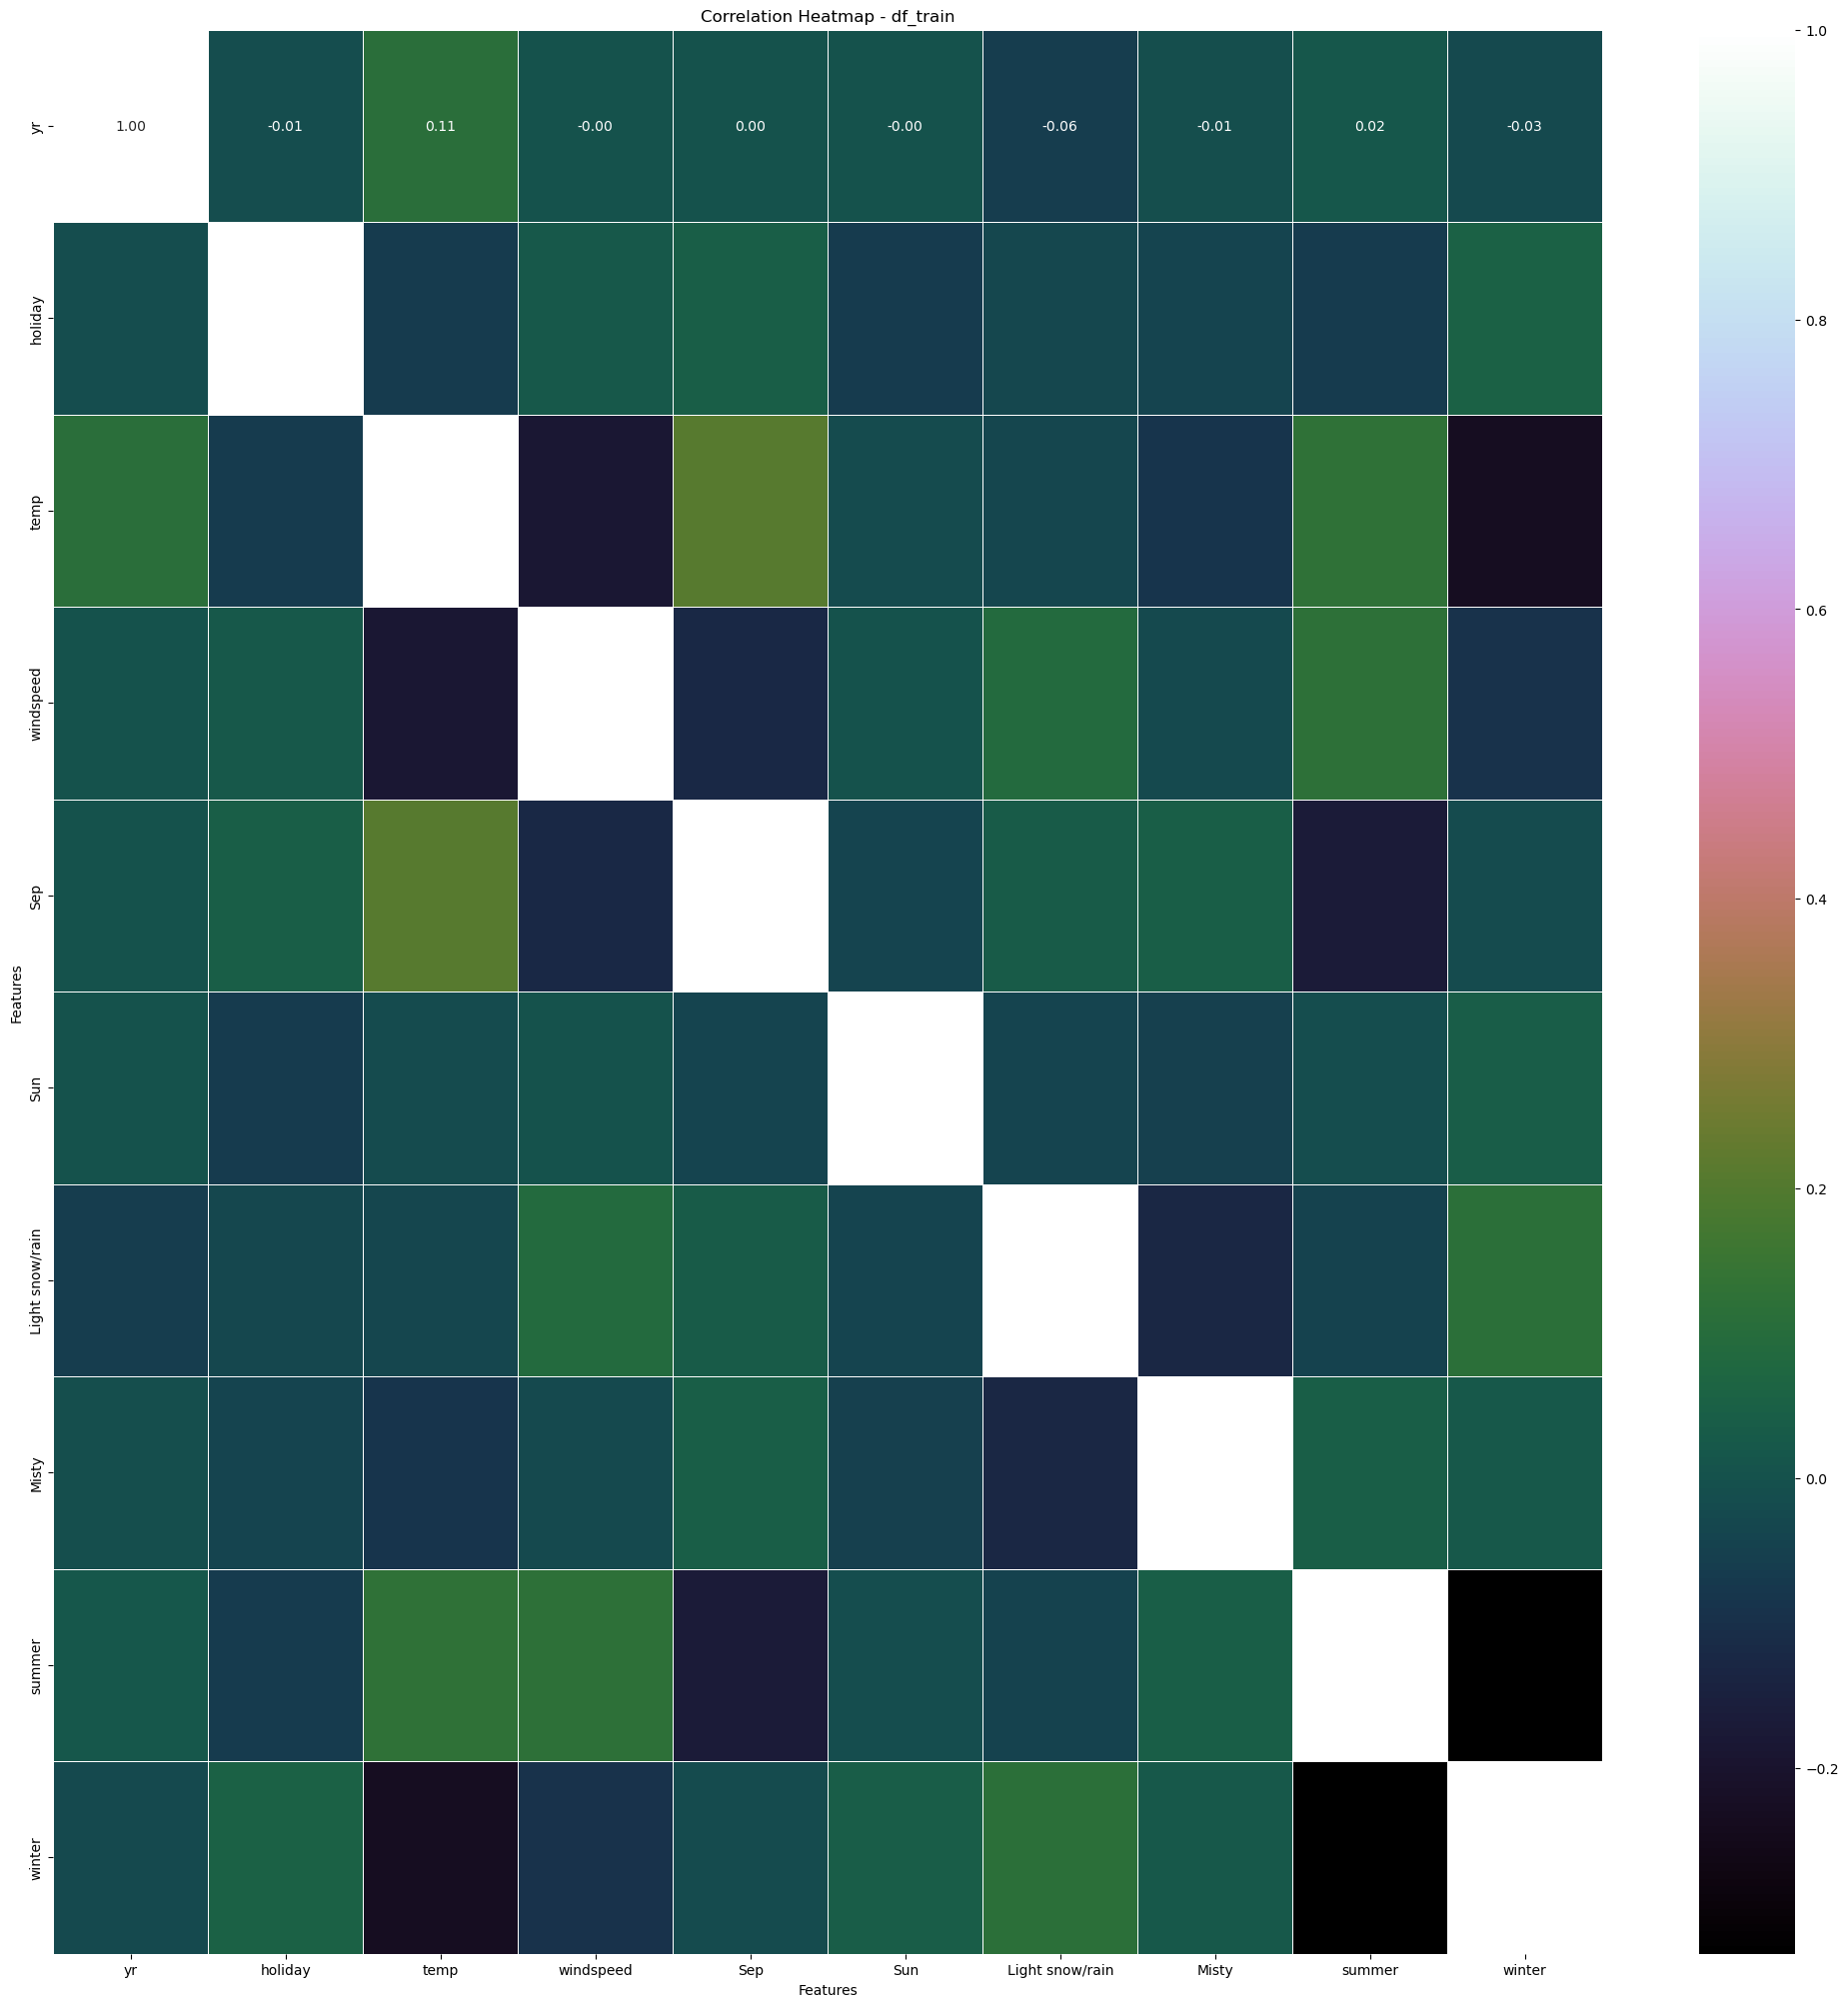

In [443]:
# Calculate the correlation matrix
corr_matrix = X_train_updated.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Set title and labels
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

From the correlation matrix we can see that all are having very weak relation with other variables, hence all the X variables considered based on the VIF are Independent from each other.

### Validation of linearity

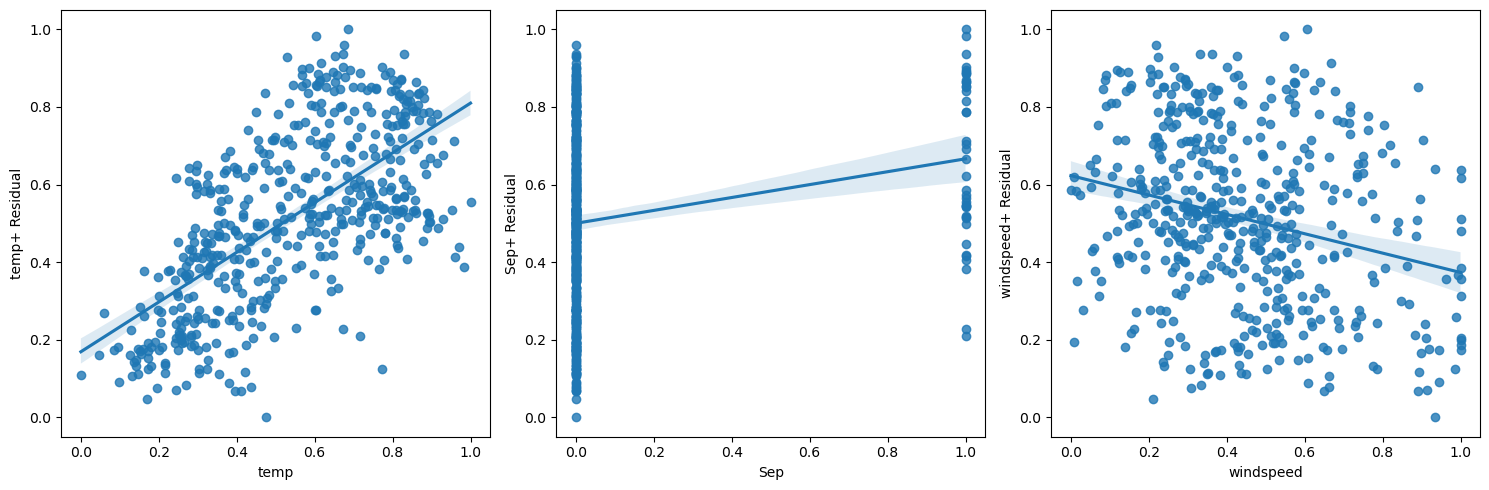

In [444]:
# Linear relationship validation 
variables= ['temp','Sep','windspeed']
fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
for i, var in enumerate(variables):
    sns.regplot(x=X_train_updated[var], y=reg_model_5.resid + reg_model_5.predict(sm.add_constant(X_train_updated)), ax=ax[i])
    ax[i].set_xlabel(var)
    ax[i].set_ylabel(str(variables[i])+'+ Residual')
plt.tight_layout()
plt.show()

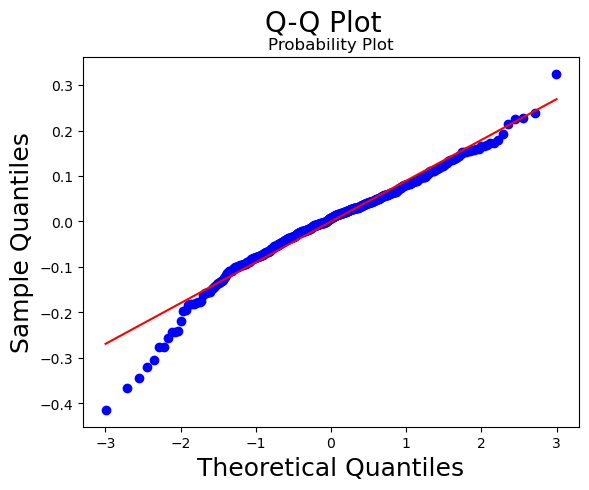

In [445]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
fig = plt.figure()
stats.probplot(y_train - y_train_pred, dist="norm", plot=plt)
fig.suptitle('Q-Q Plot', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Sample Quantiles', fontsize=18)
plt.show()

Points lie approximately along a straight line, it indicates that the residuals are normally distributed

# Step 5: Making Predictions And Model Evaluation

In [446]:

numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Apply scaling to the test dataset
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.565508,0.115794,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.505614,0.211364,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.794188,0.459509,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.286191,0.466884,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.130470,0.738905,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [447]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.541232,0.429795,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.188557,0.216662,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.064044,-0.058858,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.402981,0.273395,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.525216,0.412652,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.675113,0.553709,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002722,1.000000,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [448]:
# Assign the target variable
y_test = df_test['cnt']
X_test = df_test.drop('cnt', axis=1)  # Drop the 'count' column from the training data
# Assign the remaining columns to X_test
cols=X_train_updated.columns
X_test = df_test[cols]

In [449]:
# Add a constant variable to the test dataframe
X_test_reg_model_5 = sm.add_constant(X_test)

# Predict the target variable for the test dataset
y_pred = reg_model_5.predict(X_test_reg_model_5)
y_test = y_test.values.reshape(-1, 1)

# Calculate the R-squared score
r2 = round(r2_score(y_test, y_pred), 4)
r2

0.7965

In [450]:
# Compute R² for the training set
r2_train = round(r2_score(y_train, y_train_pred), 4)
r2_train

0.836

In [451]:
print("R2 Score of Model on Test Data:- ",r2)
print("R2 Score of Model on Train Data:- ", r2_train)



R2 Score of Model on Test Data:-  0.7965
R2 Score of Model on Train Data:-  0.836


In [452]:
X_test.head()

,yr,holiday,temp,windspeed,Sep,Sun,Light snow/rain,Misty,summer,winter
184,0,1,0.831783,0.115794,0,0,0,1,0,0
535,1,0,0.901354,0.211364,0,0,0,0,1,0
299,0,0,0.511964,0.459509,0,0,0,1,0,1
221,0,0,0.881625,0.466884,0,0,0,0,0,0
152,0,0,0.817246,0.738905,0,0,0,0,1,0


## Model Evaluation

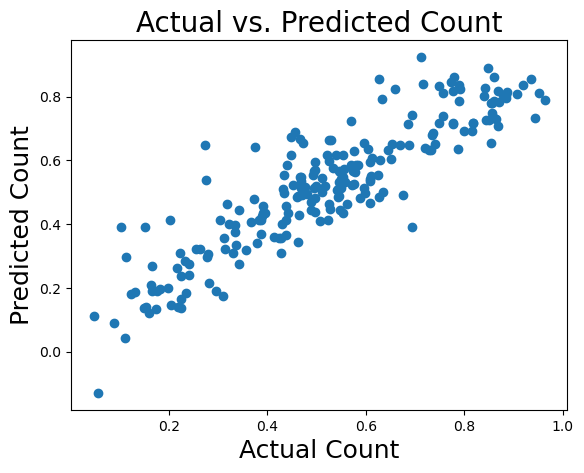

In [453]:
# Plotting actual vs predicted count
fig, ax = plt.subplots()
# Scatter plot of y_test vs y_pred
ax.scatter(y_test, y_pred)
# Setting the title and labels
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count', fontsize=18)
ax.set_ylabel('Predicted Count', fontsize=18)
# Display the plot
plt.show()

This plot demonstrates a strong and positive correlation between the actual and predicted values of Y, with most points closely clustered around the reference line

In [454]:
round(reg_model_5.params,4)

const              0.1344
yr                 0.2327
holiday           -0.1062
temp               0.5475
windspeed         -0.1130
Sep                0.0995
Sun               -0.0497
Light snow/rain   -0.2877
Misty             -0.0802
summer             0.0882
winter             0.1313
dtype: float64

#### ***from the above parameters we can actually write the line equation of the best fit line.***

### ***count = 0.1344 + 0.2327 x yr - 0.1062 x holiday + 0.5475 x temp - 0.1130 x windspeed - 0.0995 x Sep - 0.0497 x Sun - 0.2877 x Light snow/rain  - -0.0802 x Misty + 0.0882 X summer +  0.1313 X winter***  

#### ***This equation predicts the bike count (count) using the contributions of each variable based on their respective coefficients.***

In [455]:
#calculating adjusted r-squared value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7868


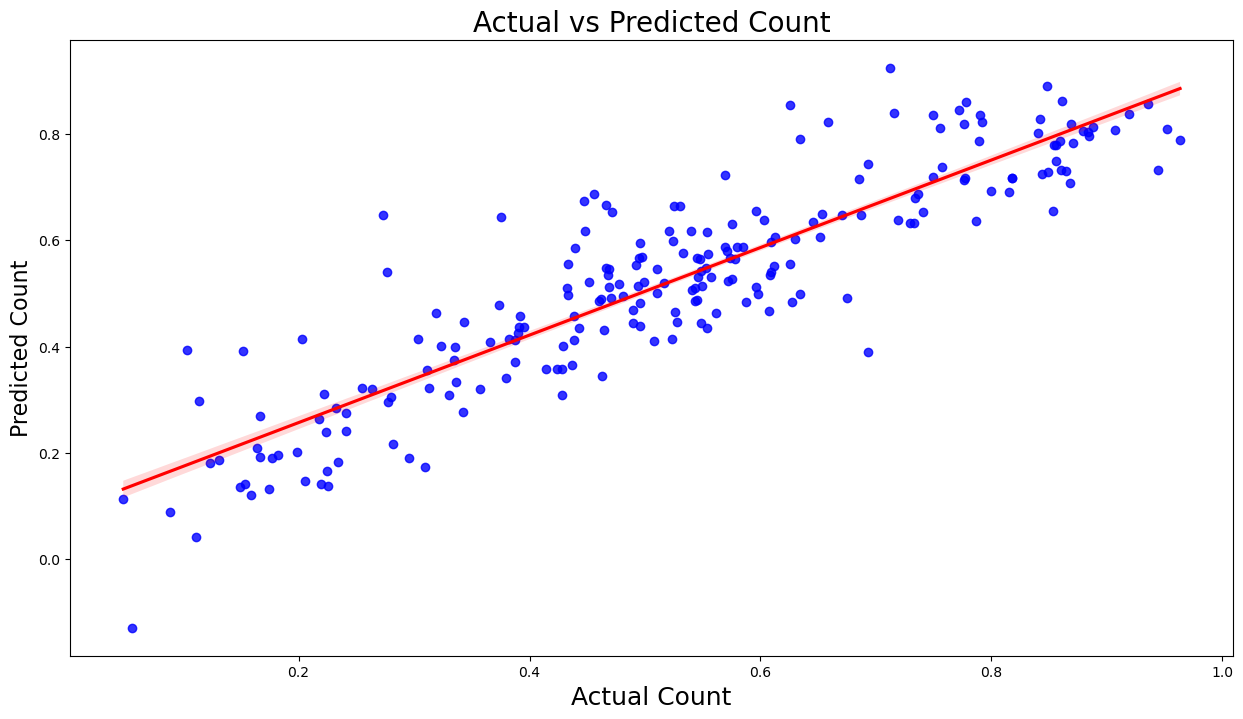

In [456]:
# Visualizing the fit on the test data
plt.figure(figsize=(15,8))
# Plotting a regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# Adding labels and title
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count', fontsize=18)
plt.ylabel('Predicted Count', fontsize=16)
plt.show()

# Conclusions:
* The model demonstrates a strong fit to the data with an R-squared (R²) of 0.836 on the training data and 0.7965 on the test data. This suggests that    approximately 83.6% of the variation in the target variable (count) is explained by the model on the training data, while 79.65% is explained on the    test data.
* The model’s F-statistic (254.3, p < 0.0001) indicates that the overall regression model is statistically significant, meaning that the predictor        variables collectively have a significant effect on predicting the target variable.
* Key Predictors and Their Impact:
   * Positive Impact on Count:
     *  **Temperature (temp, coef: 0.5475):** The strongest positive predictor. Higher temperatures lead to a significant increase in count.
     *  **Year (yr, coef: 0.2327):** Count increases as the year progresses, suggesting growth over time.
     *  **Winter (coef: 0.1313) and Summer (coef: 0.0882):** Both seasons show positive impacts, indicating higher counts in these seasons compared to            others.
     *  **September (Sep, coef: 0.0995):** Shows a positive impact.
  * Negative Impact on Count:
     * **Light snow/rain (coef: -0.2877):** The strongest negative predictor. Adverse weather significantly decreases the count.
     * **Wind speed (coef: -0.1130):** Higher wind speeds reduce the count.
     * **Holiday (coef: -0.1062):** Lower counts on holidays.
     * **Misty (coef: -0.0802) and Sun (coef: -0.0497):** Misty weather and sunlight reduce the count, though less substantially than light snow/rain.